# Latar Belakang

New York City (NYC) adalah salah satu kota metropolitan terpadat di dunia. Kota ini memberi pengaruh besar terhadap perdagangan, keuangan, media, riset, penelitian dan hiburan dunia. Agar para penduduk maupun wisatawan dapat menyelenggarakan aktivitas-aktivitas ini, taxi menjadi transportasi yang fleksibel digunakan untuk menjangkau tempat ynag tidak bisa dijangkau oleh transportasi umum

##Pernyataan Masalah

Dalam industri taxi kepuasan pelanggan dalam perjalanan menjadi unsur penting dalam meningkatkan permintaan dan pendapatan perusahaan maupun driver. Pada analisis akan dilihat hal-hal berikut sebagai refensi perusahaan meningkatkan pelayanan pelanggan
1. Bagaimana distribusi permintaan taxi di New York?
2. Apa saja faktor yang mempengaruhi tingkat kepuasan customer terhadap suatu perjalanan?
3. Apakah ada perbedaan kepuasan customer terhadap perjalanan  yang cukup  signifikan di tiap wilayah pick up?

Beberapa penelitian menggunakan tip sebagai tolak ukur kepuasan pelanggan, contohnya article The Effects of Tipping on Consumers' (https://www.researchgate.net/publication/321989281_The_Effects_of_Tipping_on_Consumers'_Satisfaction_with_Restaurants). Dalam analisis ini tip akan digunakan sebagai tolak ukur untuk menjawab pertanyaan diatas

# Data

In [578]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

##Penjelasan setiap variable (Data Dictionary)

| Features                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``VendorID``               | Kode ID yang menunjukkan vendor taksi.                                                                                        |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                         |
|                           | 2 = VeriFone Inc.                                                                                                             |   
|``lpep_pickup_datetime``   | Tanggal dan waktu saat perjalanan taksi dimulai.                                                                              |
|``lpep_dropoff_datetime``  | Tanggal dan waktu saat perjalanan taksi berakhir.                                                                             |
|``store_and_fwd_flag``     | Menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Y berarti "simpan dan lanjutkan", N berarti bukan perjalanan "simpan dan lanjutkan".                                                                                                                    |
|``RatecodeID``             | Kode tarif untuk perjalanan.                                                                                                  |
|                           |1 = Tarif standar                                                                                                              |
|                           |2 = JFK                                                                                                                        |
|                           |3 = Newark                                                                                                                     |
|                           |4 = Nassau atau Westchester                                                                                                    |
|                           |5 = Tarif yang dinegosiasikan                                                                                                  |
|                           |6 = Perjalanan kelompok.                                                                                                       |
|``PULocationID``           | ID lokasi penjemputan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.                                  |
|``DOLocationID``           | ID lokasi penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) dinonaktifkan.                                 |
|``passenger_count``        | Jumlah penumpang di dalam kendaraan.                                                                                          |
|``trip_distance``          | Jarak perjalanan dalam mil.                                                                                                   |
|``fare_amount``            | Tarif yang diukur untuk perjalanan.                                                                                           |
|``extra``                  | Biaya tambahan. Saat ini, ini hanya mencakup biaya tambahan 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.            |
|``mta_tax``                | Pajak MTA sebesar 0,50 dolar yang otomatis aktif berdasarkan tarif yang diukur yang digunakan.                                |
|``tip_amount``             | Jumlah tip. Bidang ini otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk.                                       |
|``tolls_amount``           | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                                                    |
|``ehail_fee``              | Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.           |
|``improvement_surcharge``  | Biaya tambahan sebesar 0,30 dolar yang dinilai pada awal perjalanan. Biaya tambahan ini mulai dikenakan pada tahun 2015.      |
|``total_amount``           | Jumlah total yang dikenakan kepada penumpang. Bidang ini mencakup tarif yang diukur, biaya tambahan, mta_tax, tip_amount, dan tolls_amount ditambah biaya tambahan ehail atau improvement_surcharge.                                                                                                   |
|``payment_type``           | Kode numerik yang menunjukkan metode pembayaran.                                                                              |
|``trip_type``              | Kode yang menunjukkan apakah perjalanan adalah dari sisi jalan atau dari pengiriman yang otomatis ditetapkan berdasarkan tarif yang diukur yang digunakan tetapi dapat diubah oleh pengemudi.                                                                                                               |
|                           | 1 = Street-hail                                                                                                               |
|                           | 2 = Dispatch                                                                                                                  |
|``congestion_surcharge``   | Biaya kemacetan sebesar 2,75 dolar untuk perjalanan dengan taksi kuning dan hijau di Manhattan selatan dari 96th St. Biaya tambahan ini mulai dikenakan pada tahun 2019.                                                                                                                                  |

In [579]:
df_trip=pd.read_csv('NYC TLC Trip Record (1).csv')
df_trip['VendorID'] = df_trip['VendorID'].apply(lambda x: 'Creative Mobile Technologies, LLC' if x == 1 else 'VeriFone Inc.')
pemetaan1 = {1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride'}
df_trip['RatecodeID'] = df_trip['RatecodeID'].map(pemetaan1)
pemetaan2= {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}
df_trip['payment_type'] = df_trip['payment_type'].map(pemetaan2)
pemetaan3= {1: 'Street-hail', 2: 'Dispatch'}
df_trip['trip_type'] = df_trip['trip_type'].map(pemetaan3)
df_trip

VendorID lpep_pickup_datetime  \
0                          VeriFone Inc.  2023-01-01 00:26:10   
1                          VeriFone Inc.  2023-01-01 00:51:03   
2                          VeriFone Inc.  2023-01-01 00:35:12   
3      Creative Mobile Technologies, LLC  2023-01-01 00:13:14   
4      Creative Mobile Technologies, LLC  2023-01-01 00:33:04   
...                                  ...                  ...   
68206                      VeriFone Inc.  2023-01-31 22:29:00   
68207                      VeriFone Inc.  2023-01-31 22:40:00   
68208                      VeriFone Inc.  2023-01-31 23:46:00   
68209                      VeriFone Inc.  2023-01-31 23:01:00   
68210                      VeriFone Inc.  2023-01-31 23:51:00   

      lpep_dropoff_datetime store_and_fwd_flag     RatecodeID  PULocationID  \
0       2023-01-01 00:37:11                  N  Standard rate           166   
1       2023-01-01 00:57:49                  N  Standard rate            24   
2       2023-01-01 00:41:32                  N  Standard rate           223   
3       2023-01-01 00:19:03                  N  Standard rate            41   
4       2023-01-01 00:39:02                  N  Standard rate            41   
...                     ...                ...            ...           ...   
68206   2023-01-31 22:42:00                NaN            NaN            49   
68207   2023-01-31 22:48:00                NaN            NaN            10   
68208   2023-02-01 00:02:00                NaN            NaN            66   
68209   2023-01-31 23:19:00                NaN            NaN           225   
68210   2023-02-01 00:07:00                NaN            NaN           256   

       DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
0               143              1.0           2.58        14.90    1.0   
1                43              1.0           1.81        10.70    1.0   
2               179              1.0           0.00         7.20    1.0   
3               238              1.0           1.30         6.50    0.5   
4                74              1.0           1.10         6.00    0.5   
...             ...              ...            ...          ...    ...   
68206            62              NaN        4070.82        15.70    0.0   
68207           205              NaN           2.14         4.41    0.0   
68208            37              NaN           3.44        16.53    0.0   
68209           189              NaN           3.03        14.98    0.0   
68210           140              NaN           5.82        23.65    0.0   

       mta_tax  tip_amount  tolls_amount  ehail_fee  improvement_surcharge  \
0          0.5        4.03           0.0        NaN                    1.0   
1          0.5        2.64           0.0        NaN                    1.0   
2          0.5        1.94           0.0        NaN                    1.0   
3          1.5        1.70           0.0        NaN                    1.0   
4          1.5        0.00           0.0        NaN                    1.0   
...        ...         ...           ...        ...                    ...   
68206      0.0        0.00           0.0        NaN                    1.0   
68207      0.0        0.00           0.0        NaN                    1.0   
68208      0.0        3.51           0.0        NaN                    1.0   
68209      0.0        3.20           0.0        NaN                    1.0   
68210      0.0        2.00           0.0        NaN                    1.0   

       total_amount payment_type    trip_type  congestion_surcharge  
0             24.18  Credit card  Street-hail                  2.75  
1             15.84  Credit card  Street-hail                  0.00  
2             11.64  Credit card  Street-hail                  0.00  
3             10.20  Credit card  Street-hail                  0.00  
4              8.00  Credit card  Street-hail                  0.00  
...             ...          ...          ..

In [580]:
df_location=pd.read_csv('taxi_zone_lookup.csv')
df_location.fillna('Unknown', inplace=True)
df_location

LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                       NV      Unknown
264         265        Unknown                  Unknown      Unknown

[265 rows x 4 columns]

In [581]:
df = pd.merge(df_trip, df_location, left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'PU_Borough', 'Zone': 'PU_Zone', 'service_zone': 'PU_service_zone'}, inplace=True)
df = pd.merge(df, df_location, left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'DO_Borough', 'Zone': 'DO_Zone', 'service_zone': 'DO_service_zone'}, inplace=True)
df

VendorID lpep_pickup_datetime  \
0                          VeriFone Inc.  2023-01-01 00:26:10   
1                          VeriFone Inc.  2023-01-01 00:51:03   
2                          VeriFone Inc.  2023-01-01 00:35:12   
3      Creative Mobile Technologies, LLC  2023-01-01 00:13:14   
4      Creative Mobile Technologies, LLC  2023-01-01 00:33:04   
...                                  ...                  ...   
68206                      VeriFone Inc.  2023-01-31 22:29:00   
68207                      VeriFone Inc.  2023-01-31 22:40:00   
68208                      VeriFone Inc.  2023-01-31 23:46:00   
68209                      VeriFone Inc.  2023-01-31 23:01:00   
68210                      VeriFone Inc.  2023-01-31 23:51:00   

      lpep_dropoff_datetime store_and_fwd_flag     RatecodeID  PULocationID  \
0       2023-01-01 00:37:11                  N  Standard rate           166   
1       2023-01-01 00:57:49                  N  Standard rate            24   
2       2023-01-01 00:41:32                  N  Standard rate           223   
3       2023-01-01 00:19:03                  N  Standard rate            41   
4       2023-01-01 00:39:02                  N  Standard rate            41   
...                     ...                ...            ...           ...   
68206   2023-01-31 22:42:00                NaN            NaN            49   
68207   2023-01-31 22:48:00                NaN            NaN            10   
68208   2023-02-01 00:02:00                NaN            NaN            66   
68209   2023-01-31 23:19:00                NaN            NaN           225   
68210   2023-02-01 00:07:00                NaN            NaN           256   

       DOLocationID  passenger_count  trip_distance  fare_amount  ...  \
0               143              1.0           2.58        14.90  ...   
1                43              1.0           1.81        10.70  ...   
2               179              1.0           0.00         7.20  ...   
3               238              1.0           1.30         6.50  ...   
4                74              1.0           1.10         6.00  ...   
...             ...              ...            ...          ...  ...   
68206            62              NaN        4070.82        15.70  ...   
68207           205              NaN           2.14         4.41  ...   
68208            37              NaN           3.44        16.53  ...   
68209           189              NaN           3.03        14.98  ...   
68210           140              NaN           5.82        23.65  ...   

         trip_type  congestion_surcharge  LocationID_x  PU_Borough  \
0      Street-hail                  2.75           166   Manhattan   
1      Street-hail                  0.00            24   Manhattan   
2      Street-hail                  0.00           223      Queens   
3      Street-hail                  0.00            41   Manhattan   
4      Street-hail                  0.00            41   Manhattan   
...            ...                   ...           ...         ...   
68206          NaN                   NaN            49    Brooklyn   
68207          NaN                   NaN            10      Queens   
68208          NaN                   NaN            66    Brooklyn   
68209          NaN                   NaN           225    Brooklyn   
68210          NaN                   NaN           256    Brooklyn   

                         PU_Zone  PU_service_zone  LocationID_y DO_Borough  \
0            Morningside Heights        Boro Zone           143  Manhattan   
1                   Bloomingdale      Yellow Zone            43  Manhattan   
2                       Steinway        Boro Zone           179     Queens   
3                 Central Harlem        Boro Zone           238  Manhattan   
4                 Central Harlem        Boro Zone            74  Manhattan   
...                          ...              ...           ...        ...   
68206               Clinton Hill      

# Data Understanding dan Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

##Missing Values Distribution

Value kosong akan diseragamkan terlebih dahulu penulisannya sebagai berikut

In [582]:
for col in df.columns:
  df.loc[df[col] == 'nan', col] = np.NaN

<Axes: >

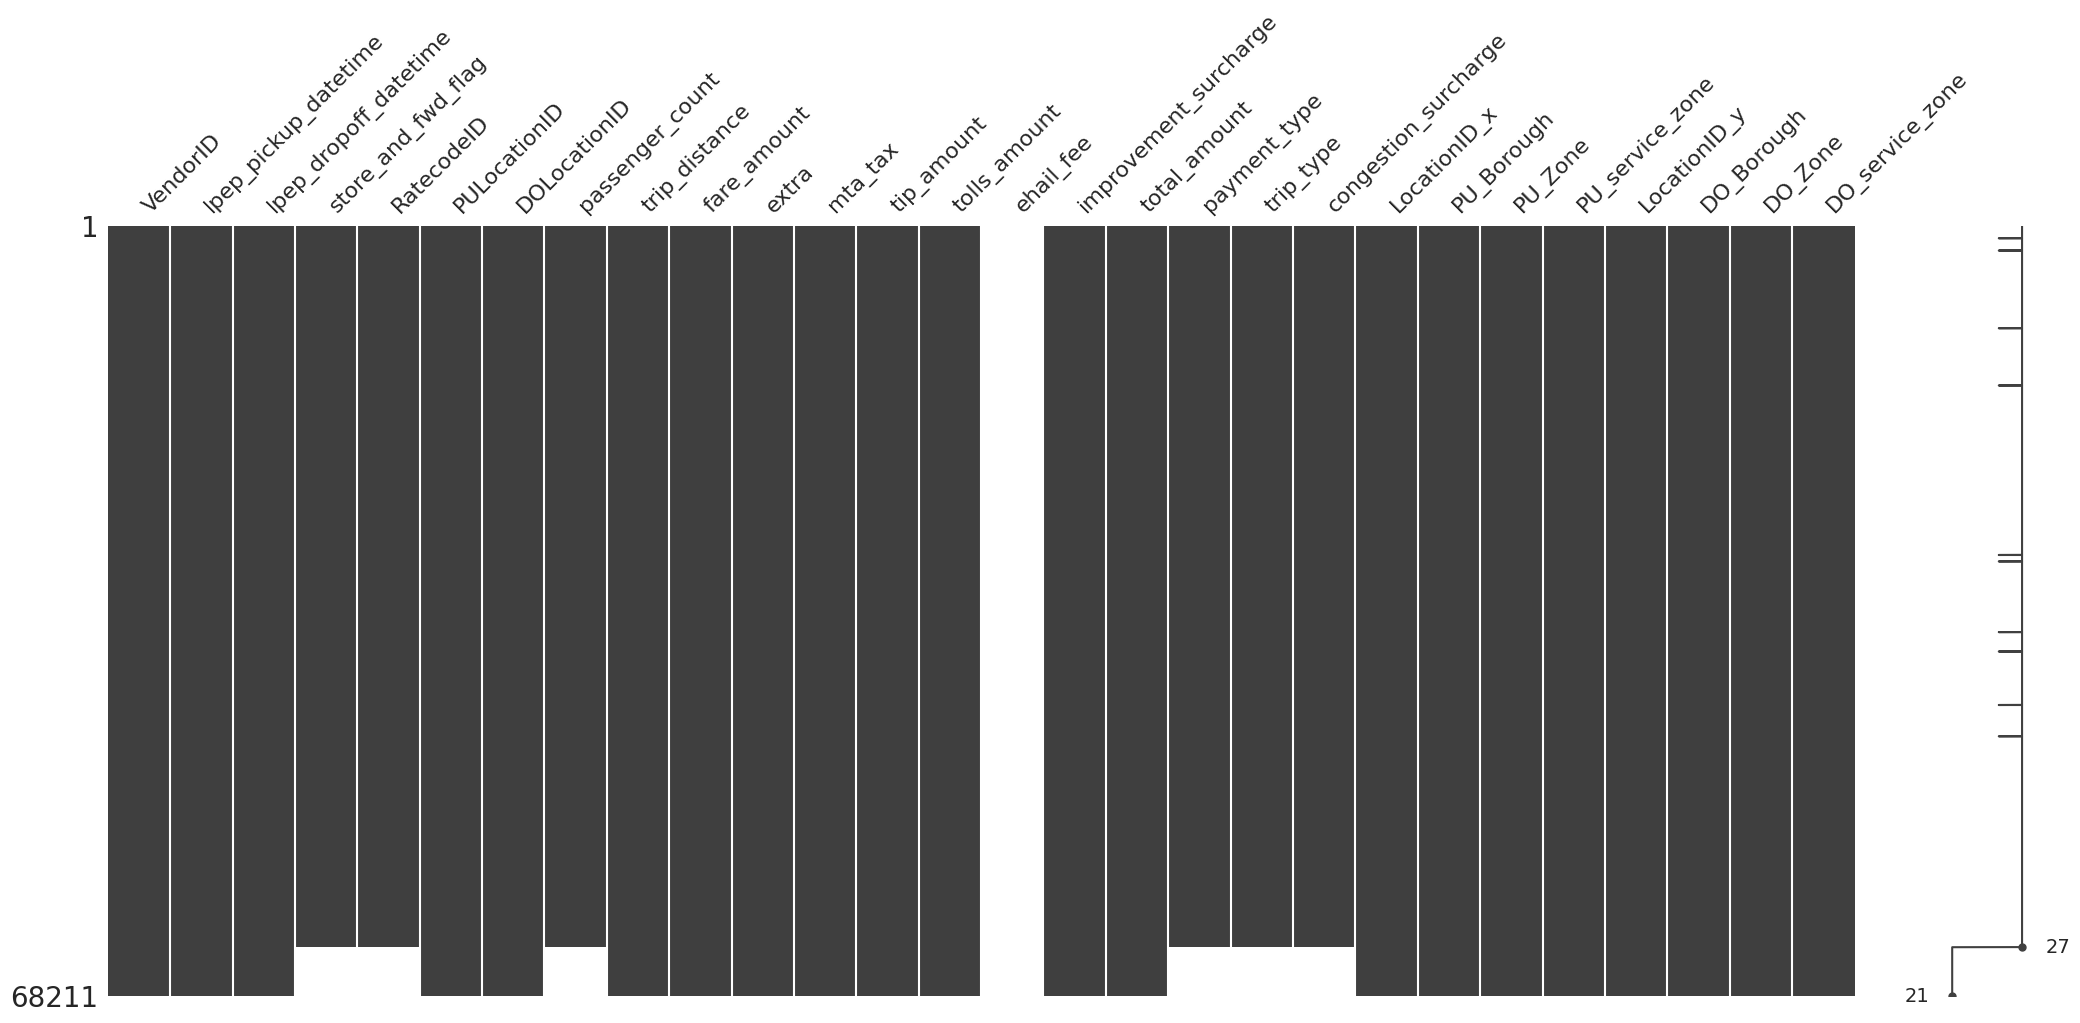

In [583]:
import missingno
missingno.matrix(df)

Berdasarkan grafik di atas missing value terdapat pada posisi baris yang sama untuk kolom kecuali pada kolom ehail fee. Kolom ehail fee ini akan di delete karena kolom ini kosong

In [584]:
# Menghapus kolom 'ehail_fee'
df = df.drop('ehail_fee', axis=1)


In [585]:
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing['persentase (%)'] = round(missing['jumlah']/len(df)*100,4)
missing

jumlah  persentase (%)
RatecodeID               4334          6.3538
trip_type                4334          6.3538
store_and_fwd_flag       4324          6.3392
passenger_count          4324          6.3392
congestion_surcharge     4324          6.3392
payment_type             4324          6.3392
VendorID                    0          0.0000
total_amount                0          0.0000
DO_Zone                     0          0.0000
DO_Borough                  0          0.0000
LocationID_y                0          0.0000
PU_service_zone             0          0.0000
PU_Zone                     0          0.0000
PU_Borough                  0          0.0000
LocationID_x                0          0.0000
tolls_amount                0          0.0000
improvement_surcharge       0          0.0000
lpep_pickup_datetime        0          0.0000
tip_amount                  0          0.0000
mta_tax                     0          0.0000
extra                       0          0.0000
fare_amount                 0          0.0000
trip_distance               0          0.0000
DOLocationID                0          0.0000
PULocationID                0          0.0000
lpep_dropoff_datetime       0          0.0000
DO_service_zone             0          0.0000

In [586]:
# lihat semua data yang kosong
df[df.isna().any(axis = 1)]

VendorID lpep_pickup_datetime  \
1084   Creative Mobile Technologies, LLC  2023-01-01 19:44:13   
2174   Creative Mobile Technologies, LLC  2023-01-02 16:39:05   
9055   Creative Mobile Technologies, LLC  2023-01-05 20:33:45   
14125  Creative Mobile Technologies, LLC  2023-01-08 11:36:41   
29143  Creative Mobile Technologies, LLC  2023-01-15 13:51:42   
...                                  ...                  ...   
68206                      VeriFone Inc.  2023-01-31 22:29:00   
68207                      VeriFone Inc.  2023-01-31 22:40:00   
68208                      VeriFone Inc.  2023-01-31 23:46:00   
68209                      VeriFone Inc.  2023-01-31 23:01:00   
68210                      VeriFone Inc.  2023-01-31 23:51:00   

      lpep_dropoff_datetime store_and_fwd_flag RatecodeID  PULocationID  \
1084    2023-01-01 19:58:30                  N        NaN         150.0   
2174    2023-01-02 17:31:42                  N        NaN          73.0   
9055    2023-01-05 22:46:41                  N        NaN          14.0   
14125   2023-01-08 12:14:59                  N        NaN          61.0   
29143   2023-01-15 14:37:38                  N        NaN         108.0   
...                     ...                ...        ...           ...   
68206   2023-01-31 22:42:00                NaN        NaN          49.0   
68207   2023-01-31 22:48:00                NaN        NaN          10.0   
68208   2023-02-01 00:02:00                NaN        NaN          66.0   
68209   2023-01-31 23:19:00                NaN        NaN         225.0   
68210   2023-02-01 00:07:00                NaN        NaN         256.0   

       DOLocationID  passenger_count  trip_distance  fare_amount  ...  \
1084           55.0              1.0           3.30        18.20  ...   
2174           82.0              1.0           3.70        23.50  ...   
9055          123.0              1.0           6.20        28.20  ...   
14125          77.0              1.0           2.70        22.50  ...   
29143         181.0              1.0           6.50        24.20  ...   
...             ...              ...            ...          ...  ...   
68206          62.0              NaN        4070.82        15.70  ...   
68207         205.0              NaN           2.14         4.41  ...   
68208          37.0              NaN           3.44        16.53  ...   
68209         189.0              NaN           3.03        14.98  ...   
68210         140.0              NaN           5.82        23.65  ...   

       trip_type  congestion_surcharge  LocationID_x  PU_Borough  \
1084         NaN                   0.0         150.0    Brooklyn   
2174         NaN                   0.0          73.0      Queens   
9055         NaN                   0.0          14.0    Brooklyn   
14125        NaN                   0.0          61.0    Brooklyn   
29143        NaN                   0.0         108.0    Brooklyn   
...          ...                   ...           ...         ...   
68206        NaN                   NaN          49.0    Brooklyn   
68207        NaN                   NaN          10.0      Queens   
68208        NaN                   NaN          66.0    Brooklyn   
68209        NaN                   NaN         225.0    Brooklyn   
68210        NaN                   NaN         256.0    Brooklyn   

                         PU_Zone  PU_service_zone LocationID_y DO_Borough  \
1084             Manhattan Beach        Boro Zone         55.0   Brooklyn   
2174               East Flushing        Boro Zone         82.0     Queens   
9055                   Bay Ridge        Boro Zone        123.0   Brooklyn   
14125        Crown Heights North        Boro Zone         77.0   Brooklyn   
29143                  Gravesend        Boro Zone        181.0   Brooklyn   
...                          ...              ...          ...        ...   
68206               Clinton Hill        Boro Zone         62.0   Brooklyn   
68207               Baisley Park        

#Data Cleaning

##Data Duplikat

In [587]:
# jumlah yang duplikat
df.duplicated().sum()

0

Berdasarkan semua values dalam kolom fitur memang tidak ditemukan data duplikat. Namun berdasarkan pemahaman dari data source, data duplikat dapat dilihat berdasarkan fitur lpep_pickup_datetime, lpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance (mil)

In [588]:
duplicate_value= df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicate_value

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
662    VeriFone Inc.  2023-01-01 14:58:13   2023-01-01 14:58:39   
663    VeriFone Inc.  2023-01-01 14:58:13   2023-01-01 14:58:39   
898    VeriFone Inc.  2023-01-01 17:24:52   2023-01-01 17:25:12   
899    VeriFone Inc.  2023-01-01 17:24:52   2023-01-01 17:25:12   
1317   VeriFone Inc.  2023-01-02 02:05:08   2023-01-02 02:12:57   
...              ...                  ...                   ...   
63656  VeriFone Inc.  2023-01-31 20:29:00   2023-01-31 20:29:14   
63807  VeriFone Inc.  2023-01-31 22:44:16   2023-01-31 22:45:18   
63808  VeriFone Inc.  2023-01-31 22:44:16   2023-01-31 22:45:18   
63868  VeriFone Inc.  2023-01-31 23:44:44   2023-01-31 23:45:15   
63869  VeriFone Inc.  2023-01-31 23:44:44   2023-01-31 23:45:15   

      store_and_fwd_flag       RatecodeID  PULocationID  DOLocationID  \
662                    N    Standard rate          75.0          74.0   
663                    N    Standard rate          75.0          74.0   
898                    N    Standard rate         193.0         193.0   
899                    N    Standard rate         193.0         193.0   
1317                   N    Standard rate         129.0          82.0   
...                  ...              ...           ...           ...   
63656                  N    Standard rate          74.0          74.0   
63807                  N    Standard rate         256.0         256.0   
63808                  N    Standard rate         256.0         256.0   
63868                  N  Negotiated fare         264.0         264.0   
63869                  N  Negotiated fare         264.0         264.0   

       passenger_count  trip_distance  fare_amount  ...    trip_type  \
662                2.0           0.17         -3.0  ...  Street-hail   
663                2.0           0.17          3.0  ...  Street-hail   
898                1.0           0.00         -3.0  ...  Street-hail   
899                1.0           0.00          3.0  ...  Street-hail   
1317               1.0           0.64         -8.6  ...  Street-hail   
...                ...            ...          ...  ...          ...   
63656              1.0           0.00          2.5  ...  Street-hail   
63807              1.0           0.15         -3.7  ...  Street-hail   
63808              1.0           0.15          3.7  ...  Street-hail   
63868              1.0           0.00        -10.0  ...     Dispatch   
63869              1.0           0.00         10.0  ...     Dispatch   

       congestion_surcharge  LocationID_x  PU_Borough  \
662                     0.0          75.0   Manhattan   
663                     0.0          75.0   Manhattan   
898                     0.0         193.0      Queens   
899                     0.0         193.0      Queens   
1317                    0.0         129.0      Queens   
...                     ...           ...         ...   
63656                   0.0          74.0   Manhattan   
63807                   0.0         256.0    Brooklyn   
63808                   0.0         256.0    Brooklyn   
63868                   0.0         264.0     Unknown   
63869                   0.0         264.0     Unknown   

                         PU_Zone  PU_service_zone LocationID_y DO_Borough  \
662            East Harlem South        Boro Zone         74.0  Manhattan   
663            East Harlem South        Boro Zone         74.0  Manhattan   
898      Queensbridge/Ravenswood        Boro Zone        193.0     Queens   
899      Queensbridge/Ravenswood        Boro Zone        193.0     Queens   
1317             Jackson Heights        Boro Zone         82.0     Queens   
...                          ...              ...          ...        ...   
63656          East Harlem North        Boro Zone         74.0  Manhattan   
63807  Williamsburg (South Side)        Boro Zone        256.0   Brooklyn   
63808  Williamsburg (South Side)        Boro Zone        256.0   Brooklyn   
63868     

Jika duplicate value di cek berdasarkan ke-7 fitur tersebut, dapat dilihat bahwa ternyata terdapat beberapa baris data yang mirip yang mana perbedaan baris pertama dan kedua hanya terletak pada fare_amount dengan value negatif dan positif. Sehingga data dengan value negatif akan di drop dan mempertahankan value yang positif

In [589]:
dup_neg_val= duplicate_value[df['fare_amount']<0]
dup_neg_val

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
662    VeriFone Inc.  2023-01-01 14:58:13   2023-01-01 14:58:39   
898    VeriFone Inc.  2023-01-01 17:24:52   2023-01-01 17:25:12   
1317   VeriFone Inc.  2023-01-02 02:05:08   2023-01-02 02:12:57   
1686   VeriFone Inc.  2023-01-02 12:56:53   2023-01-02 13:00:10   
1864   VeriFone Inc.  2023-01-02 13:51:33   2023-01-02 13:52:42   
...              ...                  ...                   ...   
63358  VeriFone Inc.  2023-01-31 18:39:16   2023-01-31 18:39:29   
63544  VeriFone Inc.  2023-01-31 19:06:18   2023-01-31 19:06:46   
63655  VeriFone Inc.  2023-01-31 20:29:00   2023-01-31 20:29:14   
63807  VeriFone Inc.  2023-01-31 22:44:16   2023-01-31 22:45:18   
63868  VeriFone Inc.  2023-01-31 23:44:44   2023-01-31 23:45:15   

      store_and_fwd_flag       RatecodeID  PULocationID  DOLocationID  \
662                    N    Standard rate          75.0          74.0   
898                    N    Standard rate         193.0         193.0   
1317                   N    Standard rate         129.0          82.0   
1686                   N    Standard rate          75.0          75.0   
1864                   N    Standard rate          75.0          75.0   
...                  ...              ...           ...           ...   
63358                  N    Standard rate         130.0         130.0   
63544                  N    Standard rate          75.0          75.0   
63655                  N    Standard rate          74.0          74.0   
63807                  N    Standard rate         256.0         256.0   
63868                  N  Negotiated fare         264.0         264.0   

       passenger_count  trip_distance  fare_amount  ...    trip_type  \
662                2.0           0.17         -3.0  ...  Street-hail   
898                1.0           0.00         -3.0  ...  Street-hail   
1317               1.0           0.64         -8.6  ...  Street-hail   
1686               1.0           0.77         -4.5  ...  Street-hail   
1864               2.0           0.08         -3.7  ...  Street-hail   
...                ...            ...          ...  ...          ...   
63358              3.0           0.05         -3.0  ...  Street-hail   
63544              2.0           0.08         -3.0  ...  Street-hail   
63655              1.0           0.00         -2.5  ...  Street-hail   
63807              1.0           0.15         -3.7  ...  Street-hail   
63868              1.0           0.00        -10.0  ...     Dispatch   

       congestion_surcharge  LocationID_x  PU_Borough  \
662                     0.0          75.0   Manhattan   
898                     0.0         193.0      Queens   
1317                    0.0         129.0      Queens   
1686                    0.0          75.0   Manhattan   
1864                    0.0          75.0   Manhattan   
...                     ...           ...         ...   
63358                   0.0         130.0      Queens   
63544                   0.0          75.0   Manhattan   
63655                   0.0          74.0   Manhattan   
63807                   0.0         256.0    Brooklyn   
63868                   0.0         264.0     Unknown   

                         PU_Zone  PU_service_zone LocationID_y DO_Borough  \
662            East Harlem South        Boro Zone         74.0  Manhattan   
898      Queensbridge/Ravenswood        Boro Zone        193.0     Queens   
1317             Jackson Heights        Boro Zone         82.0     Queens   
1686           East Harlem South        Boro Zone         75.0  Manhattan   
1864           East Harlem South        Boro Zone         75.0  Manhattan   
...                          ...              ...          ...        ...   
63358                    Jamaica        Boro Zone        130.0     Queens   
63544          East Harlem South        Boro Zone         75.0  Manhattan   
63655          East Harlem North        Boro Zone         74.0  Manhattan   
63807  Wil

In [590]:
df.drop(dup_neg_val.index, inplace=True)

##Negative Values

In [591]:
pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

feature  neg_value(%)
0                VendorID         0.000
1    lpep_pickup_datetime         0.000
2   lpep_dropoff_datetime         0.000
3      store_and_fwd_flag         0.000
4              RatecodeID         0.000
5            PULocationID         0.000
6            DOLocationID         0.000
7         passenger_count         0.000
8           trip_distance         0.000
9             fare_amount         0.007
10                  extra         0.000
11                mta_tax         0.004
12             tip_amount         0.000
13           tolls_amount         0.000
14  improvement_surcharge         0.004
15           total_amount         0.012
16           payment_type         0.000
17              trip_type         0.000
18   congestion_surcharge         0.001
19           LocationID_x         0.000
20             PU_Borough         0.000
21                PU_Zone         0.000
22        PU_service_zone         0.000
23           LocationID_y         0.000
24             DO_Borough         0.000
25                DO_Zone         0.000
26        DO_service_zone         0.000

Namun ternyata masih ditemukan negatif values pada fitur fair_amount, mta_tax, improvement shurcharge, total_amount & congestion_surcharge. Karena fitur-fitur tersebut berhubungan dengan keuangan yang notabene tidak logis bernilai negatif maka negatif values pada feature tesebut akan diabsolutkan

In [592]:
neg_val_fare= df[df['fare_amount']<0]
df.loc[neg_val_fare.index, 'fare_amount'] = df['fare_amount'].abs()
neg_val_mta= df[df['mta_tax']<0]
df.loc[neg_val_mta.index, 'mta_tax'] = df['mta_tax'].abs()
neg_val_surcharge= df[df['improvement_surcharge']<0]
df.loc[neg_val_surcharge.index, 'improvement_surcharge'] = df['improvement_surcharge'].abs()
neg_val_total= df[df['total_amount']<0]
df.loc[neg_val_total.index, 'total_amount'] = df['total_amount'].abs()
neg_val_congestion= df[df['congestion_surcharge']<0]
df.loc[neg_val_congestion.index, 'congestion_surcharge'] = df['congestion_surcharge'].abs()

In [593]:
pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

feature  neg_value(%)
0                VendorID           0.0
1    lpep_pickup_datetime           0.0
2   lpep_dropoff_datetime           0.0
3      store_and_fwd_flag           0.0
4              RatecodeID           0.0
5            PULocationID           0.0
6            DOLocationID           0.0
7         passenger_count           0.0
8           trip_distance           0.0
9             fare_amount           0.0
10                  extra           0.0
11                mta_tax           0.0
12             tip_amount           0.0
13           tolls_amount           0.0
14  improvement_surcharge           0.0
15           total_amount           0.0
16           payment_type           0.0
17              trip_type           0.0
18   congestion_surcharge           0.0
19           LocationID_x           0.0
20             PU_Borough           0.0
21                PU_Zone           0.0
22        PU_service_zone           0.0
23           LocationID_y           0.0
24             DO_Borough           0.0
25                DO_Zone           0.0
26        DO_service_zone           0.0

##Zero Values

In [594]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3).sort_values(by='0_value(%)', ascending=False).reset_index(drop=True)

feature data_type  0_value(%)
0            tolls_amount   float64      97.441
1    congestion_surcharge   float64      68.823
2                   extra   float64      59.719
3              tip_amount   float64      42.119
4                 mta_tax   float64       8.479
5           trip_distance   float64       4.822
6         passenger_count   float64       0.494
7   improvement_surcharge   float64       0.273
8             fare_amount   float64       0.122
9            total_amount   float64       0.101
10                PU_Zone    object       0.000
11        PU_service_zone    object       0.000
12           LocationID_y   float64       0.000
13             DO_Borough    object       0.000
14                DO_Zone    object       0.000
15             PU_Borough    object       0.000
16           LocationID_x   float64       0.000
17               VendorID    object       0.000
18              trip_type    object       0.000
19           payment_type    object       0.000
20   lpep_pickup_datetime    object       0.000
21           DOLocationID   float64       0.000
22           PULocationID   float64       0.000
23             RatecodeID    object       0.000
24     store_and_fwd_flag    object       0.000
25  lpep_dropoff_datetime    object       0.000
26        DO_service_zone    object       0.000

- Terdapat beberapa fitur yang bernilai 0
1. tip amount memungkinkan bernilai 0 yang artinya penumpang tidak memberi tip
2. extra memungkinkan bernilai 0 yang artinya perjalanan tidak pada jam sibuk atau pada malam hari
3. tolls_amount memungkinkan bernilai 0 yang artinya perjalanan tidak melalui toll
4. congestion_surcharge memungkinkan bernilai 0 yang artinya perjalanan tidak melewati Manhattan Selatan
5. mta_tax & improvement surcharge tidak dihandling karena tidak digunakan pada proses analisa
6. Mengubah value 0 pada jumlah penumpang dengan central tendency (median) dari fitur tersebut.


In [595]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
#df = df[df['trip_distance']>0]
#df = df[df['fare_amount']>0]

## Handling Missing Values

### Missing values Kategorik

In [596]:
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing['persentase (%)'] = round(missing['jumlah']/len(df)*100,4)
missing

jumlah  persentase (%)
RatecodeID               4334          6.3698
trip_type                4334          6.3698
store_and_fwd_flag       4324          6.3551
passenger_count          4324          6.3551
congestion_surcharge     4324          6.3551
payment_type             4324          6.3551
VendorID                    0          0.0000
total_amount                0          0.0000
DO_Zone                     0          0.0000
DO_Borough                  0          0.0000
LocationID_y                0          0.0000
PU_service_zone             0          0.0000
PU_Zone                     0          0.0000
PU_Borough                  0          0.0000
LocationID_x                0          0.0000
tolls_amount                0          0.0000
improvement_surcharge       0          0.0000
lpep_pickup_datetime        0          0.0000
tip_amount                  0          0.0000
mta_tax                     0          0.0000
extra                       0          0.0000
fare_amount                 0          0.0000
trip_distance               0          0.0000
DOLocationID                0          0.0000
PULocationID                0          0.0000
lpep_dropoff_datetime       0          0.0000
DO_service_zone             0          0.0000

#### store_and_fwd_flag

Missing values pada kolom ini akan diisi dengan dengan valuee unknown

In [597]:
df['store_and_fwd_flag'].fillna('Unknown', inplace=True)
print(df['store_and_fwd_flag'].value_counts())
print('Total NaN values: ', len(df[df['store_and_fwd_flag'].isna()]))

store_and_fwd_flag
N          63408
Unknown     4324
Y            308
Name: count, dtype: int64
Total NaN values:  0


#### RatecodeID

Berdasarkan https://www.nyc.gov/site/tlc/passengers/taxi-fare.page, berikut adalah kode RatecodeID:

1. Standard City Rate:  Jenis tarif untuk perjalanan dalam kota
2. JFK Airport: Perjalanan antara Manhattan dan Bandara John F. Kennedy (JFK)
3. Newark Airport: Perjalanan ke Bandara Newark (EWR)
4. Out of City Rate to Nassau or Westchester: Perjalanan melampaui batas Kota ke Nassau atau Westchester
5. Out of City Negotiated Flat Rate:  Titik Lain di Luar Kota


In [598]:
df['RatecodeID'].value_counts()

RatecodeID
Standard rate            61943
Negotiated fare           1520
JFK                        156
Nassau or Westchester       57
Newark                      30
Name: count, dtype: int64

In [599]:
print('Total NaN values: ', len(df[df['RatecodeID'].isna()]))

Total NaN values:  4334


In [600]:
df[df['RatecodeID']=='Nassau or Westchester'][['PU_Borough', 'DO_Borough']].value_counts()

PU_Borough  DO_Borough
Queens      Unknown       38
Manhattan   Unknown        7
Unknown     Unknown        4
Bronx       Unknown        2
Brooklyn    Unknown        2
Manhattan   Manhattan      2
            EWR            1
Unknown     Queens         1
Name: count, dtype: int64

- Berdasarkan informasi di atas, diketahui bahwa value unknown tersebut kemungkinan besar adalah Kota Nassau atau Westchester

- Namun karena analisis ini hanya fokus terhadap kota New York maka data untuk tujuan Nassau atau Wetchester akan di drop

- Sebelum didrop, ada beberapa kesalahan record harus ditangani pada ratecode tersebut


In [601]:
df.loc[(df['RatecodeID']=='Nassau or Westchester') & (df['PU_Borough']!='Unknown') & (df['DO_Borough']=='EWR'), 'RatecodeID'] = 'Newark'
df.loc[(df['RatecodeID']=='Nassau or Westchester') & (df['PU_Borough']!='Unknown') & (df['DO_Borough']!='Unknown'), 'RatecodeID'] = 'Standard rate'

In [602]:
df.drop(df[df['PU_Borough']=='Unknown'].index, inplace=True)
df.drop(df[df['DO_Borough']=='Unknown'].index, inplace=True)

In [603]:
df['RatecodeID'] = df['RatecodeID'].replace(99, np.NaN)
df['RatecodeID'] = df['RatecodeID'].replace(205, np.NaN)
df.loc[(df['PU_Borough']=='Manhattan') & (df['DO_Zone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 'JFK'
df.loc[(df['PU_Zone']=='JFK Airport') & (df['DO_Borough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 'JFK'
df.loc[(df['DO_Zone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 'Newark'

In [604]:
df['RatecodeID'].fillna('Standard rate', inplace=True)
print(df['RatecodeID'].value_counts())
print('Total NaN values: ', len(df[df['RatecodeID'].isna()]))

RatecodeID
Standard rate      65842
Negotiated fare     1265
JFK                  198
Newark                29
Name: count, dtype: int64
Total NaN values:  0


#### payment_type

- Berdasarkan background data, diketahui bahwa tip untuk metode kartu kredit akan terisi secara otomatis. maka dapat disimpulkan jika tips > 0 maka metode yang digunakan adalah kartu kredit.

- Sisa missing value akan diisi dengan opsi unknown

In [605]:
print(df['payment_type'].value_counts())
print('Total NaN values: ', len(df[df['payment_type'].isna()]))

payment_type
Credit card    40264
Cash           22377
No charge        326
Dispute           61
Unknown            2
Name: count, dtype: int64
Total NaN values:  4304


In [606]:
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
Credit card    35299
No charge          8
Dispute            1
Cash               1
Name: count, dtype: int64

In [607]:
df.loc[(df['tip_amount']>0) & ((df['payment_type']=='Cash')|(df['payment_type']=='No charge')|(df['payment_type']=='Dispute')), 'payment_type'] = 'Credit card'
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
Credit card    35309
Name: count, dtype: int64

In [608]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)



In [609]:
print(df['payment_type'].value_counts())
print('Total NaN values: ', len(df[df['payment_type'].isna()]))

payment_type
Credit card    40274
Cash           22376
1.0             3814
5.0              490
No charge        318
Dispute           60
Unknown            2
Name: count, dtype: int64
Total NaN values:  0


### Missing Values Numerik

#### passenger_count

Pada kolom ini, missing values akan diisi dengan median

In [610]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

print(df['passenger_count'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

passenger_count
1.0    58212
2.0     5014
5.0     1759
6.0     1049
3.0      936
4.0      358
7.0        3
8.0        2
9.0        1
Name: count, dtype: int64
Total NaN values:  0


#### trip_type

In [611]:
df['trip_type'].value_counts()

trip_type
Street-hail    61880
Dispatch        1141
Name: count, dtype: int64

In [612]:
Tabel_TripType=df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))
Tabel_TripType

total
RatecodeID      trip_type         
JFK             Street-hail    153
Negotiated fare Dispatch      1135
                Street-hail    130
Newark          Street-hail     25
Standard rate   Dispatch         6
                Street-hail  61572

In [613]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

total
RatecodeID          
JFK               45
Newark             4
Standard rate   4264

Berdasarkan domain knowladge dari Tabel_TripType diperoleh untuk RatecodeID Newark dan JFK memiliki trip type Street_hail. Kemudian untuk RatecodeID Standard rate 99% trip type nya adalah Street_hail. Karena missing values trip type memiliki RatecodeID Standard Rate, Newark dan JFK maka missing values ini akan diisi dengan Street_hail

In [614]:
df['trip_type'].fillna('Street-hail', inplace=True)
df['trip_type'].value_counts()

trip_type
Street-hail    66193
Dispatch        1141
Name: count, dtype: int64

#### congestion_surcharge

Missing values pada fitur ini akan di isi dengan 0 dengan asumsi bahwa tidak mengalami macet pada saat perjalanan

In [615]:
print(df['congestion_surcharge'].value_counts())
print('Total NaN values: ', len(df[df['congestion_surcharge'].isna()]))

congestion_surcharge
0.00    46152
2.75    16862
2.50       16
Name: count, dtype: int64
Total NaN values:  4304


In [616]:

df.loc[df['congestion_surcharge'].isna(),'congestion_surcharge'] = 0


In [617]:
print('Total NaN values: ', len(df[df['congestion_surcharge'].isna()]))

Total NaN values:  0


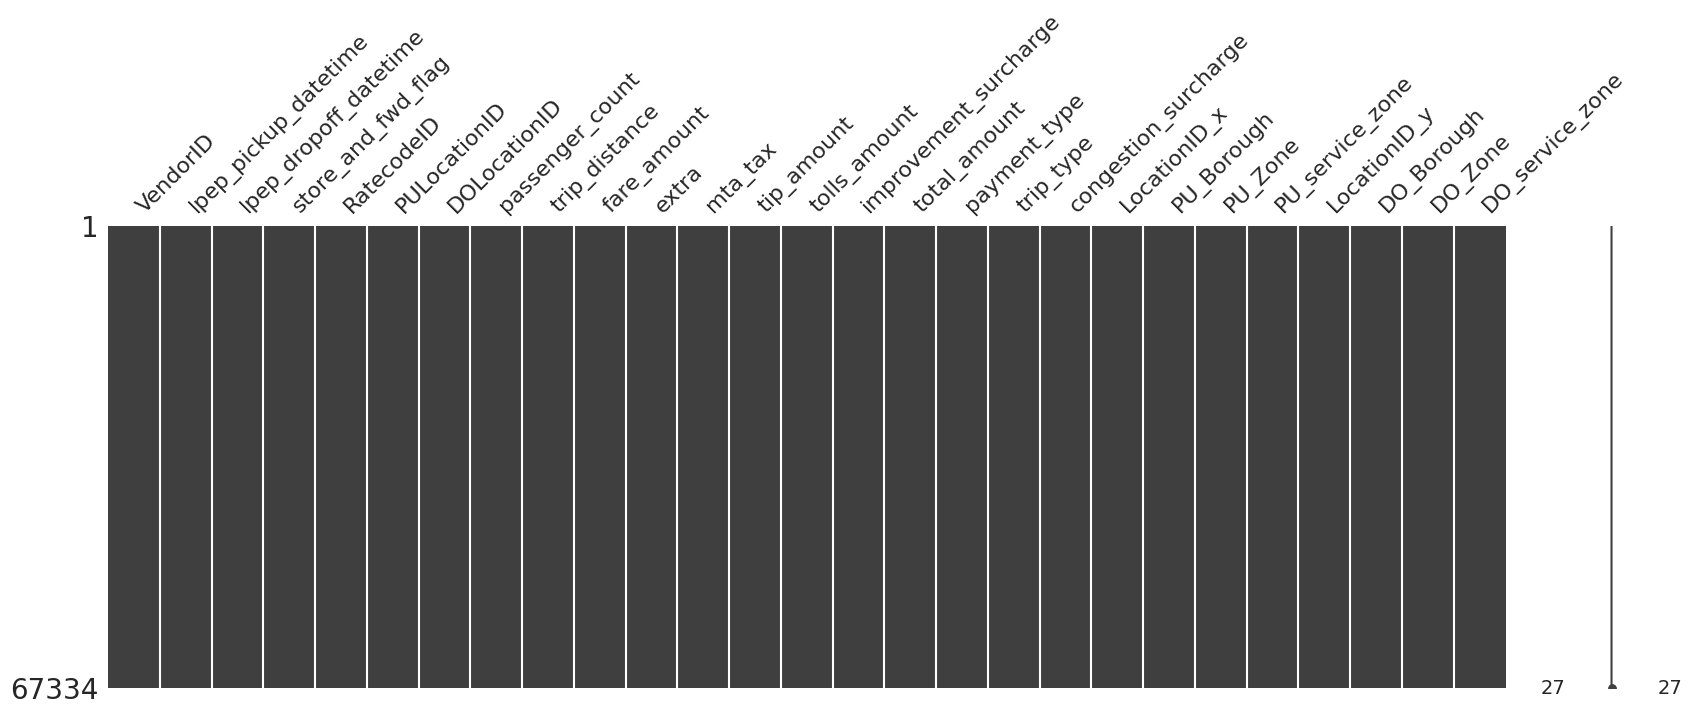

In [618]:
missingno.matrix(df, figsize=(20, 6))
plt.show()

## Outliers Handling (Numerik)

### Pick up and Drop off Datetime

Karena data lpep_pickup_datetime & lpep_dropoff_datetime yang diluar januari 2023 hanya sedikit, data ini akan di delete untuk menghasilkan analisa yang terfokus untuk transaksi januari 2023

In [619]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [620]:
outliers = df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]
outliers

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
298    VeriFone Inc.  2022-12-09 14:10:49   2022-12-09 14:22:26   
318    VeriFone Inc.  2022-12-09 14:55:42   2022-12-09 15:33:06   
17874  VeriFone Inc.  2009-01-01 20:21:27   2009-01-02 11:07:31   
25100  VeriFone Inc.  2023-02-01 03:10:05   2023-02-01 03:40:35   

      store_and_fwd_flag       RatecodeID  PULocationID  DOLocationID  \
298                    N    Standard rate           7.0          56.0   
318                    N    Standard rate         260.0         164.0   
17874                  N    Standard rate          65.0         178.0   
25100                  N  Negotiated fare          82.0         198.0   

       passenger_count  trip_distance  fare_amount  ...    trip_type  \
298                1.0           5.37         16.0  ...  Street-hail   
318                1.0           5.48         25.5  ...  Street-hail   
17874              1.0           7.72         34.5  ...  Street-hail   
25100              2.0           4.58         28.0  ...     Dispatch   

       congestion_surcharge  LocationID_x  PU_Borough  \
298                    0.00           7.0      Queens   
318                    2.75         260.0      Queens   
17874                  0.00          65.0    Brooklyn   
25100                  0.00          82.0      Queens   

                           PU_Zone  PU_service_zone LocationID_y DO_Borough  \
298                        Astoria        Boro Zone         56.0     Queens   
318                       Woodside        Boro Zone        164.0  Manhattan   
17874  Downtown Brooklyn/MetroTech        Boro Zone        178.0   Brooklyn   
25100                     Elmhurst        Boro Zone        198.0     Queens   

                   DO_Zone  DO_service_zone  
298                 Corona        Boro Zone  
318          Midtown South      Yellow Zone  
17874  Ocean Parkway South        Boro Zone  
25100            Ridgewood        Boro Zone  

[4 rows x 27 columns]

In [621]:
df.drop(outliers.index, inplace=True)

In [622]:
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge, LocationID_x, PU_Borough, PU_Zone, PU_service_zone, LocationID_y, DO_Borough, DO_Zone, DO_service_zone]
Index: []

[0 rows x 27 columns]

### Passangger Count

In [623]:
df['passenger_count'].value_counts()


passenger_count
1.0    58209
2.0     5013
5.0     1759
6.0     1049
3.0      936
4.0      358
7.0        3
8.0        2
9.0        1
Name: count, dtype: int64

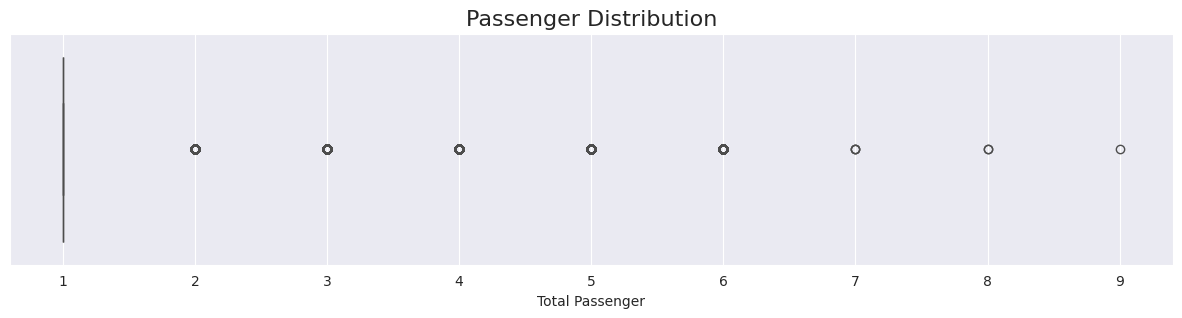

In [624]:
plt.figure(figsize=(15, 3))
color=['grey']
sns.set_style("darkgrid")

sns.boxplot(data=df, x='passenger_count',color=color[0])
plt.xlabel('Total Passenger')
plt.title('Passenger Distribution', fontsize=16)

plt.show()

- Berdasarkan peraturan https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

    Jumlah maksimum penumpang yang diperbolehkan dalam taksi adalah 4 atau 5 penumpang, kecuali penumpang tambahan harus diterima jika penumpang berusia di bawah tujuh (7) tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang. Dalam hal ini passenger count > 3 akan di gabungkan dalam 1 grup

In [625]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: '>3' if x>3 else str(x))
df['passenger_count'].value_counts()

passenger_count
1.0    58209
2.0     5013
>3      3172
3.0      936
Name: count, dtype: int64

### Trip Distance

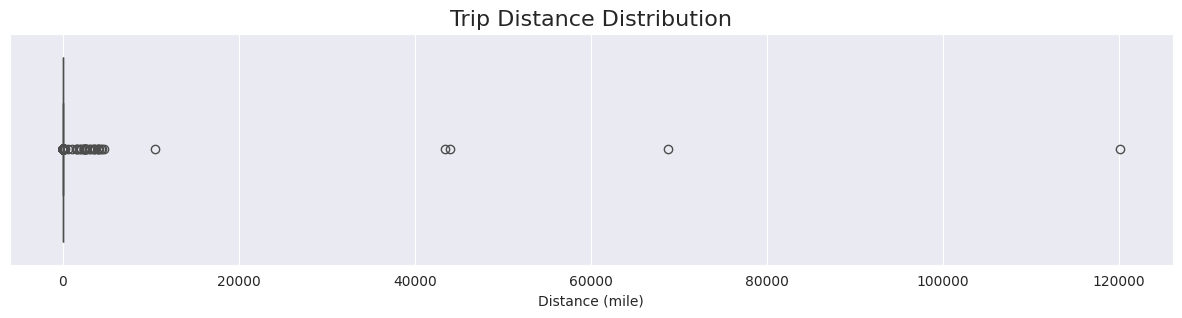

In [626]:
color=['grey']
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

- Dengan anggapan bahwa taksi yang menempuh jarak kurang dari 1 km (0,62 miles) merupakan record yang tidak wajar ataupun record yang gagal seperti kemungkinan penumpang atau driver membatalkan pesanan, maka dataset yang memiliki nilai tersebut akan didrop

In [627]:
print('Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles):', len(df[df['trip_distance']<0.62]))
df = df[df['trip_distance']>0.62]
df[df['trip_distance']>50][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount']].sort_values(by='trip_distance', ascending=True).head()

Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles): 6396


lpep_pickup_datetime lpep_dropoff_datetime  PULocationID  DOLocationID  \
7322   2023-01-05 09:00:03   2023-01-05 15:18:38         134.0         134.0   
64695  2023-01-06 14:16:00   2023-01-06 14:59:00          82.0         130.0   
66580  2023-01-20 09:16:00   2023-01-20 09:59:00         133.0          90.0   
63995  2023-01-01 12:35:00   2023-01-01 12:58:00         181.0         137.0   
65149  2023-01-10 15:40:00   2023-01-10 16:24:00          26.0          37.0   

       trip_distance  fare_amount  
7322           66.18        15.00  
64695         137.95        44.90  
66580         254.65        45.44  
63995         579.63        28.49  
65149        1082.45        49.80

In [628]:
outliers = df[df['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance']]
print('Total outliers:',len(outliers))
outliers.head()

Total outliers: 38


PULocationID  DOLocationID  trip_distance
7322          134.0         134.0          66.18
33373          82.0         236.0        1571.97
63995         181.0         137.0         579.63
64446         193.0         140.0        2555.47
64558          49.0          65.0        3077.89

- Terdapat extreme outliers yaitu trip distance > 50 mil. Data extreme outliers di atas akan diubah nilainya dengan nilai central tendency (median) dari trip_distance untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [629]:
ct_distance_byid = df[df['trip_distance']<50].groupby(['PULocationID', 'DOLocationID']).agg(count=('trip_distance', 'count'),
                                                                                            avg_distance=('trip_distance', 'mean'),
                                                                                            median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byid.sample(7, random_state=3)

PULocationID  DOLocationID  count  avg_distance  median_distance
2582         112.0         102.0      1      5.910000            5.910
4334         226.0         170.0      3      4.023333            4.020
4793         256.0          48.0      3      6.326667            6.460
2625         112.0         237.0      1      4.080000            4.080
737           41.0         119.0      8      3.088750            3.245
1171          55.0          21.0      1      4.570000            4.570
285           25.0          21.0      1      7.220000            7.220

In [630]:
distance_byid = pd.merge(outliers, ct_distance_byid, on=['PULocationID', 'DOLocationID'], how='left')
distance_byid.drop(columns='count', axis=1, inplace=True)
distance_byid.index = outliers.index
display(distance_byid.head(5))

print('Hasil Inputasi:')
df.loc[outliers.index, 'trip_distance'] = distance_byid['median_distance']
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'trip_distance']].head()

PULocationID  DOLocationID  trip_distance  avg_distance  \
7322          134.0         134.0          66.18      1.129205   
33373          82.0         236.0        1571.97      8.023333   
63995         181.0         137.0         579.63      7.460000   
64446         193.0         140.0        2555.47      2.410000   
64558          49.0          65.0        3077.89      1.025000   

       median_distance  
7322             0.910  
33373            8.080  
63995            7.460  
64446            2.470  
64558            1.025

Hasil Inputasi:


PULocationID  DOLocationID  trip_distance
7322          134.0         134.0          0.910
33373          82.0         236.0          8.080
63995         181.0         137.0          7.460
64446         193.0         140.0          2.470
64558          49.0          65.0          1.025

- Terdapat beberapa entry yang tidak memilki record Location ID yang sama di dataset sehingga akan menyebabkan pengisian values dengan NaN values

- Untuk mengatasi masalah tersebut hampir sama dengan metode sebelumnya, perbedaanya kali ini menggunakan median dengan referensi wilayah (Borough) untuk inputasi

In [631]:
isna = df.loc[df['trip_distance'].isna()][['PU_Borough', 'DO_Borough', 'trip_distance']]
isna

PU_Borough DO_Borough  trip_distance
65149   Brooklyn   Brooklyn            NaN
65306   Brooklyn     Queens            NaN
65491      Bronx  Manhattan            NaN
66344   Brooklyn   Brooklyn            NaN
66580   Brooklyn  Manhattan            NaN
66724  Manhattan      Bronx            NaN
67307      Bronx      Bronx            NaN

In [632]:
ct_distance_byborough = df[df['trip_distance']<70].groupby(['PU_Borough', 'DO_Borough']).agg(count=('trip_distance', 'count'), avg_distance=('trip_distance', 'mean'), median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byborough.sample(5, random_state=4)

PU_Borough DO_Borough  count  avg_distance  median_distance
21  Staten Island   Brooklyn      1     11.390000            11.39
20         Queens     Queens  14126      2.678073             1.97
0           Bronx      Bronx    521      3.082236             2.50
3           Bronx     Queens     25     12.287600            10.36
12      Manhattan        EWR      7     25.880000            26.94

In [633]:
distance_byborough = pd.merge(isna, ct_distance_byborough, on=['PU_Borough', 'DO_Borough'], how='left')
distance_byborough.index = isna.index
display(distance_byborough)

print('Hasil Inputasi:')
df.loc[isna.index, 'trip_distance'] = distance_byborough['median_distance'].round(2)
display(df.loc[isna.index][['PU_Borough', 'DO_Borough', 'trip_distance']])

PU_Borough DO_Borough  trip_distance  count  avg_distance  \
65149   Brooklyn   Brooklyn            NaN   6020      2.613547   
65306   Brooklyn     Queens            NaN    438      9.387329   
65491      Bronx  Manhattan            NaN    253      4.992470   
66344   Brooklyn   Brooklyn            NaN   6020      2.613547   
66580   Brooklyn  Manhattan            NaN   1586      5.966778   
66724  Manhattan      Bronx            NaN   1431      4.112418   
67307      Bronx      Bronx            NaN    521      3.082236   

       median_distance  
65149            2.015  
65306            9.540  
65491            3.400  
66344            2.015  
66580            5.635  
66724            3.290  
67307            2.500

Hasil Inputasi:


PU_Borough DO_Borough  trip_distance
65149   Brooklyn   Brooklyn           2.01
65306   Brooklyn     Queens           9.54
65491      Bronx  Manhattan           3.40
66344   Brooklyn   Brooklyn           2.01
66580   Brooklyn  Manhattan           5.64
66724  Manhattan      Bronx           3.29
67307      Bronx      Bronx           2.50

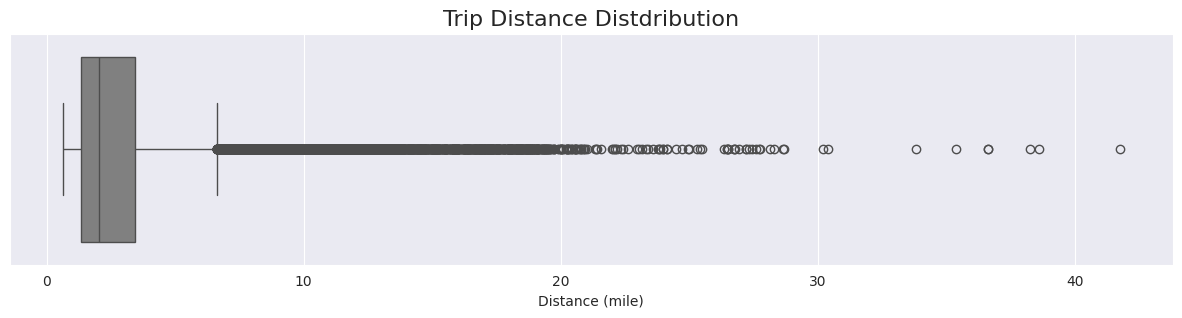

In [634]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distdribution', fontsize=16)

plt.show()

- Setelah selesai mengatasi extreme outliers selanjutnya mengatasi outliers biasa dengan cara membuat bins

In [635]:
bins_of_distance = [0, 2, 6, 10, np.inf]
labels_of_distance = ['<2 miles', '3-6 miles', '7-10 miles', '>10 miles']

df['distance_bins'] = pd.cut(df['trip_distance'], bins=bins_of_distance, labels=labels_of_distance)
df['distance_bins'].value_counts()

distance_bins
<2 miles      29984
3-6 miles     24718
7-10 miles     4590
>10 miles      1548
Name: count, dtype: int64

### Adding Feature - Trip Duration

In [636]:
diff = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
df['trip_duration'] = diff.round(2)

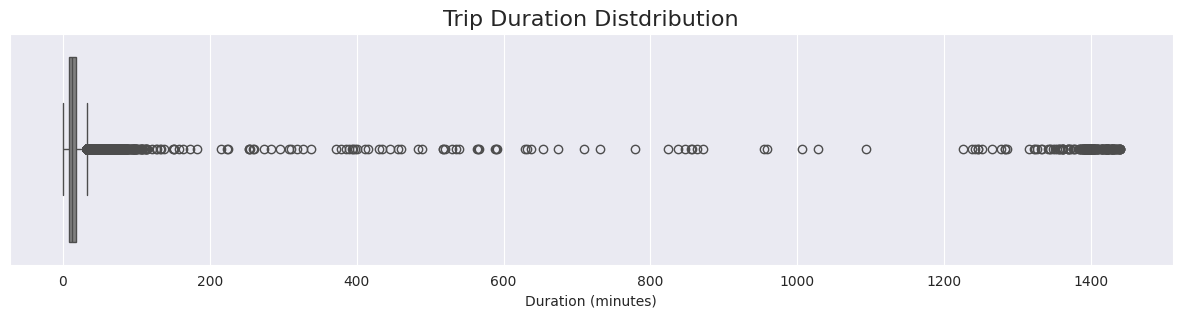

In [637]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)


plt.show()

Terdapat perjalanan dengan waktu 1-2 menit, yang perjalanan ini hal yang tidak mungkin maka diasumsikan perjalanan ini dibatalkan

In [638]:
print('Banyaknya data yang memiliki jarak kurang dari 2 menit:', len(df[df['trip_duration']<=2]))
df = df[df['trip_duration']>2]

Banyaknya data yang memiliki jarak kurang dari 2 menit: 132


- Sama seperti fitur distance sebelumnya, fitur durasi perjalanan juga terdapat extreme outliers

- Pertama ubah terlebih dahulu extreme outliers tersebut

In [639]:
df[df['trip_distance']==df['trip_distance'].max()]

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
8072  VeriFone Inc.  2023-01-05 14:53:00   2023-01-05 16:19:20   

     store_and_fwd_flag     RatecodeID  PULocationID  DOLocationID  \
8072                  N  Standard rate         130.0           1.0   

     passenger_count  trip_distance  fare_amount  ...  LocationID_x  \
8072             1.0          41.74        114.0  ...         130.0   

      PU_Borough  PU_Zone  PU_service_zone  LocationID_y  DO_Borough  \
8072      Queens  Jamaica        Boro Zone           1.0         EWR   

             DO_Zone DO_service_zone  distance_bins  trip_duration  
8072  Newark Airport             EWR      >10 miles          86.33  

[1 rows x 29 columns]

- Dengan jarak terjauh yang dimiliki yaitu 41.74 mil apabila di tempuh dengan kecepatan rata-rata terendah di Kota New York yaitu 10 mph maka waktu yang diperlukan yaitu 4.17 jam atau sekitar 250 menit. Maka dapat di asumsikan untuk durasi yang lebih dari 250 menit merupakan record extreme outliers (tidak wajar)

- Sama seperti fitur distance sebelumnya , kita akan coba ubah data extreme outliers dengan nilai central tendency (median) dari trip_duration untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [640]:
outliers = df[df['trip_duration']>250][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total extreme outliers : ', len(outliers))
outliers.head()

Total extreme outliers :  225


PULocationID  DOLocationID lpep_pickup_datetime lpep_dropoff_datetime  \
49          255.0          48.0  2023-01-01 00:23:04   2023-01-01 23:18:32   
108         260.0         223.0  2023-01-01 01:53:59   2023-01-02 00:00:00   
118         129.0          37.0  2023-01-01 01:25:46   2023-01-02 00:29:15   
207         129.0         129.0  2023-01-01 03:12:42   2023-01-02 02:03:43   
262          65.0          37.0  2023-01-01 04:03:36   2023-01-02 03:31:50   

     trip_duration  
49         1375.47  
108        1326.02  
118        1383.48  
207        1371.02  
262        1408.23

In [641]:
ct_duration_byid = df[df['trip_duration']<250].groupby(['PULocationID', 'DOLocationID']).agg(count=('distance_bins', 'count'),
                                                                                                 mean_duration=('trip_duration', 'mean'),
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byid.sample(5, random_state=3)

PULocationID  DOLocationID  count  mean_duration  median_duration
567           36.0          85.0      1         24.720           24.720
3119         136.0          88.0      1         47.820           47.820
4948         263.0          41.0      2         10.235           10.235
838           42.0          89.0      1         29.000           29.000
1985          80.0         246.0      1         37.680           37.680

In [642]:
duration_byid = pd.merge(outliers, ct_duration_byid, on=['PULocationID', 'DOLocationID'], how='left')
duration_byid.drop(columns='count', axis=1, inplace=True)
duration_byid.index = outliers.index
display(duration_byid.head())

print('Hasil inputasi:')
df.loc[outliers.index, 'trip_duration'] = duration_byid['median_duration'].round(2)
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

PULocationID  DOLocationID lpep_pickup_datetime lpep_dropoff_datetime  \
49          255.0          48.0  2023-01-01 00:23:04   2023-01-01 23:18:32   
108         260.0         223.0  2023-01-01 01:53:59   2023-01-02 00:00:00   
118         129.0          37.0  2023-01-01 01:25:46   2023-01-02 00:29:15   
207         129.0         129.0  2023-01-01 03:12:42   2023-01-02 02:03:43   
262          65.0          37.0  2023-01-01 04:03:36   2023-01-02 03:31:50   

     trip_duration  mean_duration  median_duration  
49         1375.47      24.526667           24.580  
108        1326.02      12.232537           11.880  
118        1383.48      22.133333           20.350  
207        1371.02      12.302649            9.250  
262        1408.23      23.145000           22.445

Hasil inputasi:


PULocationID  DOLocationID lpep_pickup_datetime lpep_dropoff_datetime  \
49          255.0          48.0  2023-01-01 00:23:04   2023-01-01 23:18:32   
108         260.0         223.0  2023-01-01 01:53:59   2023-01-02 00:00:00   
118         129.0          37.0  2023-01-01 01:25:46   2023-01-02 00:29:15   
207         129.0         129.0  2023-01-01 03:12:42   2023-01-02 02:03:43   
262          65.0          37.0  2023-01-01 04:03:36   2023-01-02 03:31:50   

     trip_duration  
49           24.58  
108          11.88  
118          20.35  
207           9.25  
262          22.44

- Terdapat value NaN yang kemungkinan sama seperti kasus sebelumnya dimana tidak terdapat record yang sama pada PULocation dan DOLocationID untuk fitur trip_duration

- Maka isi NaN value tersebut mennggunakan central tendency (median) dengan referensi fitur PUBorough dan DOBorough yang sama

In [643]:
isna = df.loc[outliers.index][df['trip_duration'].isna()][['PU_Borough', 'DO_Borough', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total NaN Value : ', len(isna))
isna

Total NaN Value :  13


PU_Borough DO_Borough lpep_pickup_datetime lpep_dropoff_datetime  \
556       Queens     Queens  2023-01-01 13:07:46   2023-01-01 19:45:18   
16126   Brooklyn   Brooklyn  2023-01-09 13:44:30   2023-01-10 11:07:20   
29711   Brooklyn   Brooklyn  2023-01-15 17:52:52   2023-01-15 22:11:55   
30240     Queens     Queens  2023-01-16 03:13:50   2023-01-17 00:00:00   
40817     Queens  Manhattan  2023-01-21 03:09:37   2023-01-22 01:46:44   
41975     Queens     Queens  2023-01-21 17:19:27   2023-01-22 00:00:00   
42432   Brooklyn   Brooklyn  2023-01-21 20:29:58   2023-01-22 02:59:25   
44216      Bronx      Bronx  2023-01-22 21:35:25   2023-01-23 20:42:11   
52135      Bronx  Manhattan  2023-01-26 12:45:43   2023-01-27 00:00:00   
56314   Brooklyn  Manhattan  2023-01-28 04:15:15   2023-01-29 03:58:28   
60507   Brooklyn  Manhattan  2023-01-30 13:55:08   2023-01-31 11:00:32   
61992  Manhattan  Manhattan  2023-01-31 08:46:26   2023-02-01 07:34:55   
62762     Queens     Queens  2023-01-31 15:21:47   2023-02-01 00:00:00   

       trip_duration  
556              NaN  
16126            NaN  
29711            NaN  
30240            NaN  
40817            NaN  
41975            NaN  
42432            NaN  
44216            NaN  
52135            NaN  
56314            NaN  
60507            NaN  
61992            NaN  
62762            NaN

In [644]:
ct_duration_byborough = df[df['trip_duration']<250].groupby(['PU_Borough', 'DO_Borough']).agg(count=('distance_bins', 'count'),
                                                                                                 mean_duration=('trip_duration', 'mean'),
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byborough.sample(10, random_state=5)

PU_Borough     DO_Borough  count  mean_duration  median_duration
19         Queens      Manhattan    902      26.873925           24.860
2           Bronx      Manhattan    253      20.556403           17.780
18         Queens            EWR      7      58.354286           55.330
17         Queens       Brooklyn    487      27.747741           24.930
20         Queens         Queens  14091      13.166234           11.050
22  Staten Island  Staten Island      7      11.918571            8.800
13      Manhattan      Manhattan  33758      12.402218           10.800
10      Manhattan          Bronx   1432      17.175063           15.535
5        Brooklyn       Brooklyn   6006      16.416354           13.920
1           Bronx       Brooklyn      6      40.591667           42.000

In [645]:
duration_byborough = pd.merge(isna, ct_duration_byborough, on=['PU_Borough', 'DO_Borough'], how='left')
duration_byborough.drop(columns='count', axis=1, inplace=True)
duration_byborough.index = isna.index
display(duration_byborough.head())

print('Hasil inputasi:')
df.loc[isna.index, 'trip_duration'] = duration_byborough['median_duration'].round(2)
df.loc[isna.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

PU_Borough DO_Borough lpep_pickup_datetime lpep_dropoff_datetime  \
556       Queens     Queens  2023-01-01 13:07:46   2023-01-01 19:45:18   
16126   Brooklyn   Brooklyn  2023-01-09 13:44:30   2023-01-10 11:07:20   
29711   Brooklyn   Brooklyn  2023-01-15 17:52:52   2023-01-15 22:11:55   
30240     Queens     Queens  2023-01-16 03:13:50   2023-01-17 00:00:00   
40817     Queens  Manhattan  2023-01-21 03:09:37   2023-01-22 01:46:44   

       trip_duration  mean_duration  median_duration  
556              NaN      13.166234            11.05  
16126            NaN      16.416354            13.92  
29711            NaN      16.416354            13.92  
30240            NaN      13.166234            11.05  
40817            NaN      26.873925            24.86

Hasil inputasi:


PULocationID  DOLocationID lpep_pickup_datetime lpep_dropoff_datetime  \
556           223.0           8.0  2023-01-01 13:07:46   2023-01-01 19:45:18   
16126          17.0         256.0  2023-01-09 13:44:30   2023-01-10 11:07:20   
29711         150.0         123.0  2023-01-15 17:52:52   2023-01-15 22:11:55   
30240         129.0          16.0  2023-01-16 03:13:50   2023-01-17 00:00:00   
40817         179.0         114.0  2023-01-21 03:09:37   2023-01-22 01:46:44   

       trip_duration  
556            11.05  
16126          13.92  
29711          13.92  
30240          11.05  
40817          24.86

- Ketika mengubah time duration maka perlu mengubah juga waktu dropoff untuk semua entry yang telah terdampak oleh extreme outliers di atas

In [646]:
df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

PULocationID  DOLocationID lpep_pickup_datetime lpep_dropoff_datetime  \
49          255.0          48.0  2023-01-01 00:23:04   2023-01-01 00:47:39   
108         260.0         223.0  2023-01-01 01:53:59   2023-01-01 02:05:52   
118         129.0          37.0  2023-01-01 01:25:46   2023-01-01 01:46:07   
207         129.0         129.0  2023-01-01 03:12:42   2023-01-01 03:21:57   
262          65.0          37.0  2023-01-01 04:03:36   2023-01-01 04:26:02   

     trip_duration  
49           24.58  
108          11.88  
118          20.35  
207           9.25  
262          22.44

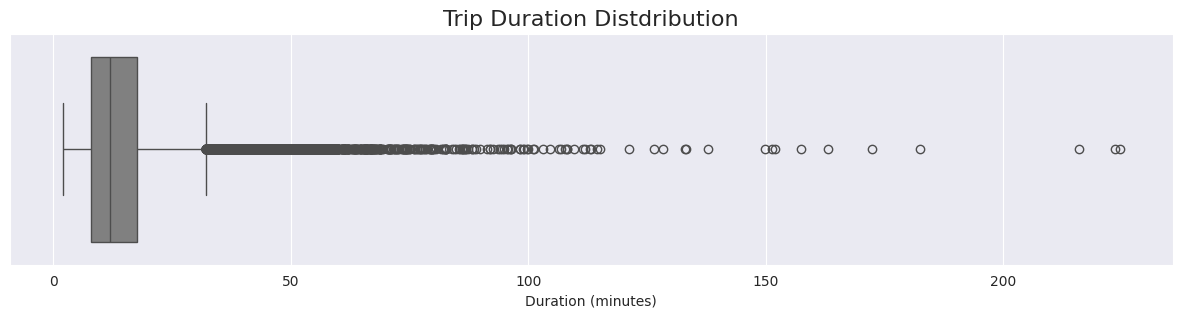

In [647]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)

plt.show()

- Setelah selesai mengatasi extreme outliers selanjutnya mengatasi outliers biasa dengan cara membuat bins

In [648]:
bins_of_duration = [0, 10, 20, 30, np.inf]
labels_of_duration = ['<10 minutes', '11-20 minutes', '21-30 minutes', '>30 minutes']

df['duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

In [649]:
df['duration_bins'].value_counts()

duration_bins
11-20 minutes    26035
<10 minutes      23321
21-30 minutes     7711
>30 minutes       3641
Name: count, dtype: int64

### Fare Amount

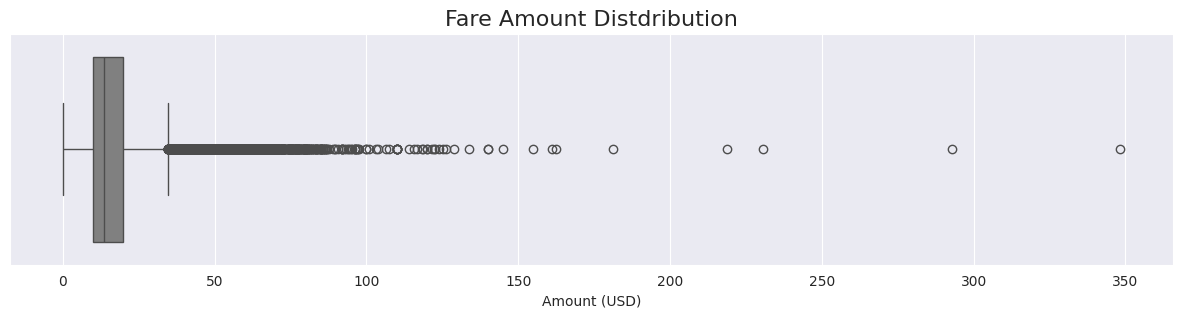

In [650]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='fare_amount', color=color[0])
plt.xlabel('Amount (USD)')
plt.title('Fare Amount Distdribution', fontsize=16)

plt.show()

- Berdasarkan korelasi sebelumnya, fare amount memiliki nilai korelasi yang tinggi terhadap trip distance yaitu sebesar 0.82

- Maka untuk menangani outliernya bisa dilihat berdasarkan kontekstual terhadap variabel tersebut

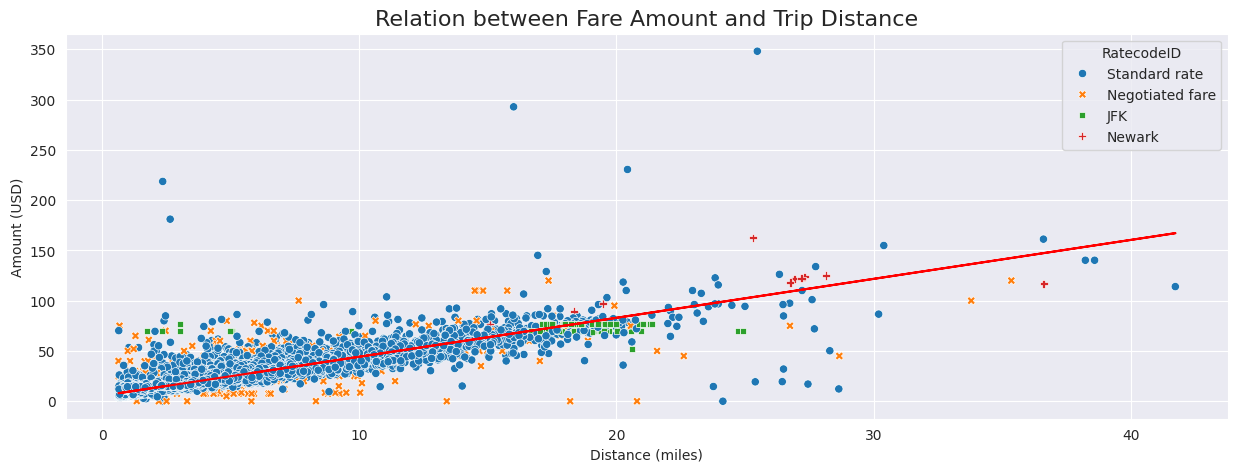

In [651]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df, x='trip_distance', y='fare_amount',  hue='RatecodeID', style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = df['trip_distance'], df['fare_amount']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

Diperoleh hubungan antara Fare amount dan jarak secara umum memiliki hubungan linear dimana ketika jarak semakin jauh maka fare amount juga semakin tinggi.

In [652]:
bins_fare = [0, 20, 40, 60, np.inf]
labels_fare = ['<20$', '21-40$', '41-60$', '>60$']
df['fare_amount_bins'] = pd.cut(df['fare_amount'], bins=bins_fare, labels=labels_fare)

### Adding Feature Driving Speed

In [653]:
df['speed'] = (df['trip_distance'] / (df['trip_duration']/60)).round(2)

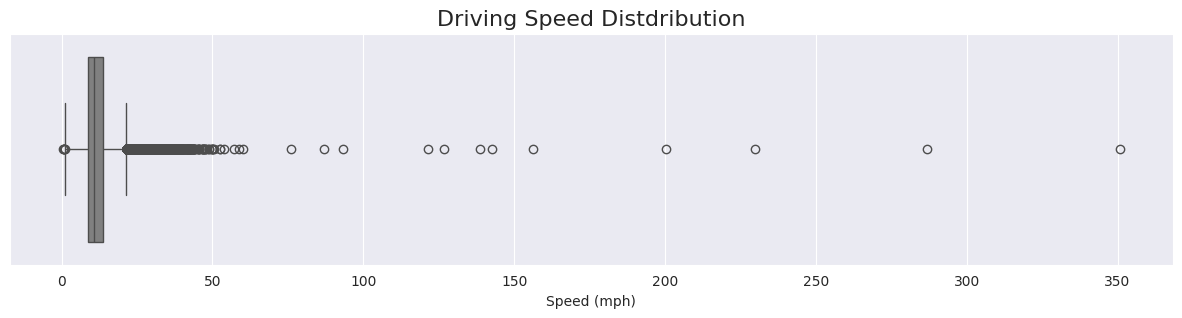

In [654]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.title('Driving Speed Distdribution', fontsize=16)

plt.show()

- Berdasarkan data dari New York City Taxi and Limousine Commission (TLC) untuk periode sebelum 2021, kecepatan rata-rata taksi sering kali ditemukan berkisar antara 10 hingga 14 mph. Namun, kecepatan ini dapat bervariasi tergantung kondisi keramaian lalu lintas, dengan kemungkinan adanya kemacetan maka diasumsikan toleransi kecepatan terendah yaitu >5 mph
- Kecepatan maksimal dalam kota adalah 25 mph sedangkan di jalan raya sekitar 65 mph
- Berdasarkan boxplot di atas terdapat extreme outliers pada fitur ini seperti kecepatan yang lebih dari 100 mph dan kurang dari 5 mph
-Extreme outliers ini akan diisi dengan median dari distance_bins

In [655]:
outliers = df[(df['speed']<5) | (df['speed']>70)][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_bins', 'trip_duration', 'duration_bins', 'speed']]
print('Total extreme outliers : ', len(outliers))
outliers.sort_values(by='speed', ascending=True).head()

Total extreme outliers :  903


lpep_pickup_datetime lpep_dropoff_datetime  trip_distance distance_bins  \
60667  2023-01-30 14:55:13   2023-01-30 16:31:28           0.64      <2 miles   
21587  2023-01-11 21:28:35   2023-01-12 00:00:00           1.63      <2 miles   
17029  2023-01-09 19:38:56   2023-01-09 20:51:12           1.03      <2 miles   
23872  2023-01-12 20:15:27   2023-01-13 00:00:00           3.32     3-6 miles   
23993  2023-01-12 21:42:06   2023-01-13 00:00:00           2.14     3-6 miles   

       trip_duration duration_bins  speed  
60667          96.25   >30 minutes   0.40  
21587         151.42   >30 minutes   0.65  
17029          72.27   >30 minutes   0.86  
23872         224.55   >30 minutes   0.89  
23993         137.90   >30 minutes   0.93

In [656]:
ct_duration = df.loc[~df.index.isin(outliers.index)].groupby('distance_bins').agg(count=('distance_bins', 'count'), avg_speed=('speed', 'mean'), median_speed=('speed', 'median')).reset_index()
ct_duration

distance_bins  count  avg_speed  median_speed
0      <2 miles  29168  10.153661          9.71
1     3-6 miles  24531  12.530698         11.43
2    7-10 miles   4571  18.964509         18.07
3     >10 miles   1535  23.487290         22.29

In [657]:
new_duration = pd.merge(outliers, ct_duration, on='distance_bins', how='left')
new_duration.index = outliers.index
new_duration.head()

lpep_pickup_datetime lpep_dropoff_datetime  trip_distance distance_bins  \
207  2023-01-01 03:12:42   2023-01-01 03:21:57           0.72      <2 miles   
545  2023-01-01 12:53:04   2023-01-01 14:10:09           4.26     3-6 miles   
556  2023-01-01 13:07:46   2023-01-01 13:18:49          16.00     >10 miles   
648  2023-01-01 13:34:51   2023-01-01 13:59:58           1.86      <2 miles   
769  2023-01-01 15:33:05   2023-01-01 16:03:34           1.15      <2 miles   

     trip_duration  duration_bins  speed  count  avg_speed  median_speed  
207           9.25    <10 minutes   4.67  29168  10.153661          9.71  
545          77.08    >30 minutes   3.32  24531  12.530698         11.43  
556          11.05  11-20 minutes  86.88   1535  23.487290         22.29  
648          25.12  21-30 minutes   4.44  29168  10.153661          9.71  
769          30.48    >30 minutes   2.26  29168  10.153661          9.71

In [658]:
df.loc[outliers.index, 'speed'] = new_duration['median_speed'].round(2)

time_duration = (df['trip_distance'] / df['speed']) * 60
df.loc[outliers.index, 'trip_duration'] = time_duration.round(2)
df.loc[outliers.index, 'duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_bins', 'trip_duration', 'duration_bins', 'speed']].head()

lpep_pickup_datetime lpep_dropoff_datetime  trip_distance distance_bins  \
207  2023-01-01 03:12:42   2023-01-01 03:17:09           0.72      <2 miles   
545  2023-01-01 12:53:04   2023-01-01 13:15:26           4.26     3-6 miles   
556  2023-01-01 13:07:46   2023-01-01 13:50:50          16.00     >10 miles   
648  2023-01-01 13:34:51   2023-01-01 13:46:20           1.86      <2 miles   
769  2023-01-01 15:33:05   2023-01-01 15:40:12           1.15      <2 miles   

     trip_duration  duration_bins  speed  
207           4.45    <10 minutes   9.71  
545          22.36  21-30 minutes  11.43  
556          43.07    >30 minutes  22.29  
648          11.49  11-20 minutes   9.71  
769           7.11    <10 minutes   9.71

In [659]:
bins_of_speed = [0, 10, 20, 30, np.inf]
labels_of_speed = ['<10 mph', '11-20 mph', '21-30 mph', '>30 mph']
df['speed_bins'] = pd.cut(df['speed'], bins=bins_of_speed, labels=labels_of_speed)

In [660]:
df['speed_bins'].value_counts()

speed_bins
11-20 mph    30925
<10 mph      24915
21-30 mph     4150
>30 mph        718
Name: count, dtype: int64

# EDA

## Explore data numerik

### Data Distribution

In [661]:
df.describe()

lpep_pickup_datetime          lpep_dropoff_datetime  \
count                          60708                          60708   
mean   2023-01-16 22:21:56.394857472  2023-01-16 22:35:59.725785600   
min              2023-01-01 00:01:31            2023-01-01 00:13:26   
25%    2023-01-09 12:11:17.750000128  2023-01-09 12:29:15.249999872   
50%       2023-01-17 09:03:00.500000            2023-01-17 09:17:25   
75%       2023-01-24 15:54:57.500000            2023-01-24 16:08:45   
max              2023-01-31 23:58:23            2023-02-01 00:31:14   
std                              NaN                            NaN   

       PULocationID  DOLocationID  trip_distance   fare_amount         extra  \
count  60708.000000  60708.000000   60708.000000  60708.000000  60708.000000   
mean      97.289039    139.748765       2.911224     16.800672      0.868749   
min        3.000000      1.000000       0.630000      0.000000      0.000000   
25%       74.000000     74.000000       1.330000     10.000000      0.000000   
50%       75.000000    140.000000       2.040000     13.500000      0.000000   
75%      116.000000    223.000000       3.450000     19.800000      1.000000   
max      263.000000    263.000000      41.740000    348.100000      7.500000   
std       59.659310     76.080731       2.651190     11.136848      1.295245   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  60708.000000  60708.000000  60708.000000           60708.000000   
mean       0.578383      2.275887      0.158424               0.958457   
min        0.000000      0.000000      0.000000               0.000000   
25%        0.500000      0.000000      0.000000               1.000000   
50%        0.500000      2.000000      0.000000               1.000000   
75%        0.500000      3.500000      0.000000               1.000000   
max        1.500000    222.220000     36.050000               1.000000   
std        0.359683      2.999547      1.033725               0.166153   

       total_amount  congestion_surcharge  LocationID_x  LocationID_y  \
count  60708.000000          60708.000000  60708.000000  60708.000000   
mean      22.231257              0.749856     97.289039    139.748765   
min        0.000000              0.000000      3.000000      1.000000   
25%       13.600000              0.000000     74.000000     74.000000   
50%       18.480000              0.000000     75.000000    140.000000   
75%       26.510000              2.750000    116.000000    223.000000   
max      349.600000              2.750000    263.000000    263.000000   
std       13.403294              1.224614     59.659310     76.080731   

       trip_duration         speed  
count   60708.000000  60708.000000  
mean       14.055525     12.116205  
min         2.020000      5.000000  
25%         7.920000      8.830000  
50%        11.730000     10.770000  
75%        17.430000     13.820000  
max       172.480000     60.050000  
std         9.262675      5.151938

### Grafik Histogram

In [662]:
numerik = df.select_dtypes(include = 'number')
numerik

PULocationID  DOLocationID  trip_distance  fare_amount  extra  mta_tax  \
0             166.0         143.0           2.58        14.90    1.0      0.5   
1              24.0          43.0           1.81        10.70    1.0      0.5   
3              41.0         238.0           1.30         6.50    0.5      1.5   
4              41.0          74.0           1.10         6.00    0.5      1.5   
5              41.0         262.0           2.78        17.70    1.0      0.5   
...             ...           ...            ...          ...    ...      ...   
68206          49.0          62.0           2.31        15.70    0.0      0.0   
68207          10.0         205.0           2.14         4.41    0.0      0.0   
68208          66.0          37.0           3.44        16.53    0.0      0.0   
68209         225.0         189.0           3.03        14.98    0.0      0.0   
68210         256.0         140.0           5.82        23.65    0.0      0.0   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0            4.03           0.0                    1.0         24.18   
1            2.64           0.0                    1.0         15.84   
3            1.70           0.0                    1.0         10.20   
4            0.00           0.0                    1.0          8.00   
5            0.00           0.0                    1.0         22.95   
...           ...           ...                    ...           ...   
68206        0.00           0.0                    1.0         16.70   
68207        0.00           0.0                    1.0          5.41   
68208        3.51           0.0                    1.0         21.04   
68209        3.20           0.0                    1.0         19.18   
68210        2.00           0.0                    1.0         29.40   

       congestion_surcharge  LocationID_x  LocationID_y  trip_duration  speed  
0                      2.75         166.0         143.0          11.02  14.05  
1                      0.00          24.0          43.0           6.77  16.04  
3                      0.00          41.0         238.0           5.82  13.40  
4                      0.00          41.0          74.0           5.97  11.06  
5                      2.75          41.0         262.0          17.55   9.50  
...                     ...           ...           ...            ...    ...  
68206                  0.00          49.0          62.0          13.00  10.66  
68207                  0.00          10.0         205.0           8.00  16.05  
68208                  0.00          66.0          37.0          16.00  12.90  
68209                  0.00         225.0         189.0          18.00  10.10  
68210                  0.00         256.0         140.0          16.00  21.83  

[60708 rows x 15 columns]

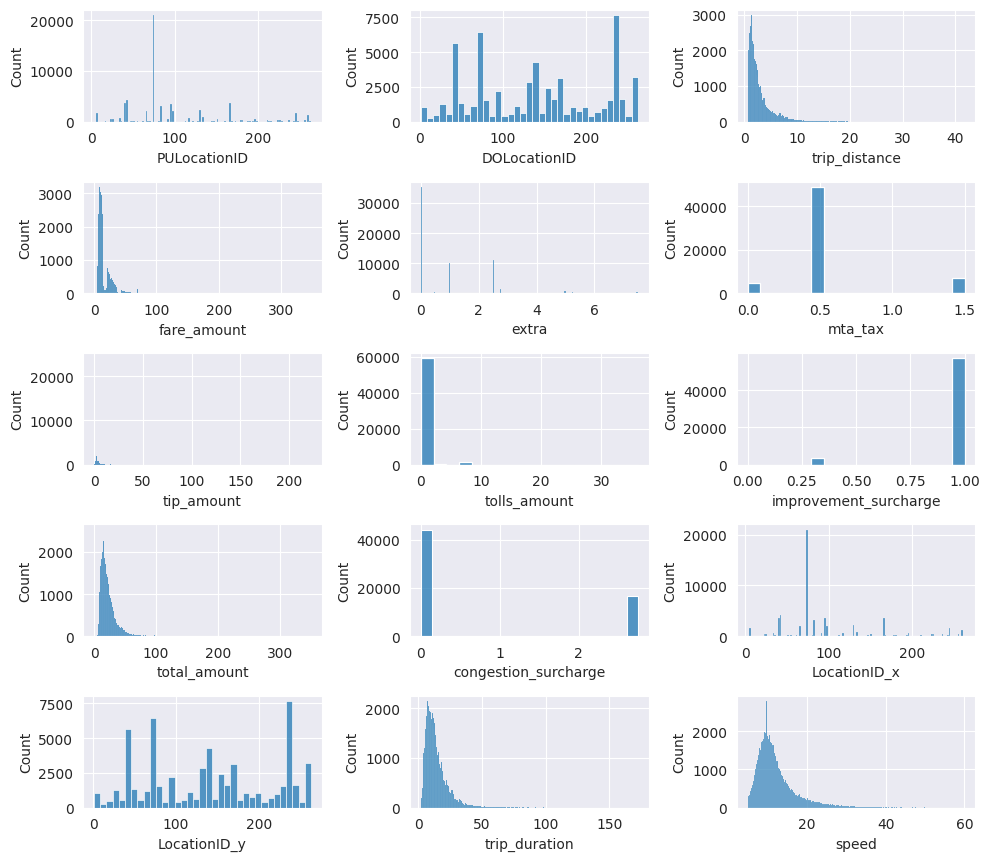

In [663]:
 # ganti ukuran pigura (wadah grafik nya)
 plt.figure(figsize = (10,10))

 posisi = 1 # menginisiasi posisi mulai dari 1
 for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
     plt.subplot(6,3,posisi)
     sns.histplot(df[setiap_kolom])
     posisi = posisi + 1
     # agar tidak bertumpuk
     plt.tight_layout()

Semua fitur tidak berdistribusi normal berdasarkan histogram

### Uji Statistika

In [664]:
df_copy = df.copy()
df_copy.dropna(inplace = True)

In [665]:
# Shapiro Wilk
from scipy.stats import shapiro

for i in numerik.columns:
  stat, pval = shapiro(df_copy[i])
  if pval < 0.05:
      print(f'{i} : Distribusi data tidak normal')
  else:
      print(f'{i} : Distribusi data normal')

PULocationID : Distribusi data tidak normal
DOLocationID : Distribusi data tidak normal
trip_distance : Distribusi data tidak normal
fare_amount : Distribusi data tidak normal
extra : Distribusi data tidak normal
mta_tax : Distribusi data tidak normal
tip_amount : Distribusi data tidak normal
tolls_amount : Distribusi data tidak normal
improvement_surcharge : Distribusi data tidak normal
total_amount : Distribusi data tidak normal
congestion_surcharge : Distribusi data tidak normal
LocationID_x : Distribusi data tidak normal
LocationID_y : Distribusi data tidak normal
trip_duration : Distribusi data tidak normal
speed : Distribusi data tidak normal


In [666]:
# D'Agustino Pearson
from scipy.stats import normaltest

for i in numerik.columns:
  stat, pval = normaltest(df_copy[i])

  if pval < 0.05:
      print(f'{i} : Distribusi data tidak normal')
  else:
      print(f'{i} : Distribusi data normal')

PULocationID : Distribusi data tidak normal
DOLocationID : Distribusi data tidak normal
trip_distance : Distribusi data tidak normal
fare_amount : Distribusi data tidak normal
extra : Distribusi data tidak normal
mta_tax : Distribusi data tidak normal
tip_amount : Distribusi data tidak normal
tolls_amount : Distribusi data tidak normal
improvement_surcharge : Distribusi data tidak normal
total_amount : Distribusi data tidak normal
congestion_surcharge : Distribusi data tidak normal
LocationID_x : Distribusi data tidak normal
LocationID_y : Distribusi data tidak normal
trip_duration : Distribusi data tidak normal
speed : Distribusi data tidak normal


Insight:
Baik menggunakan shapiro wilk dan pearson semua kolom numerik tidak berdistribusi normal

### Outliers

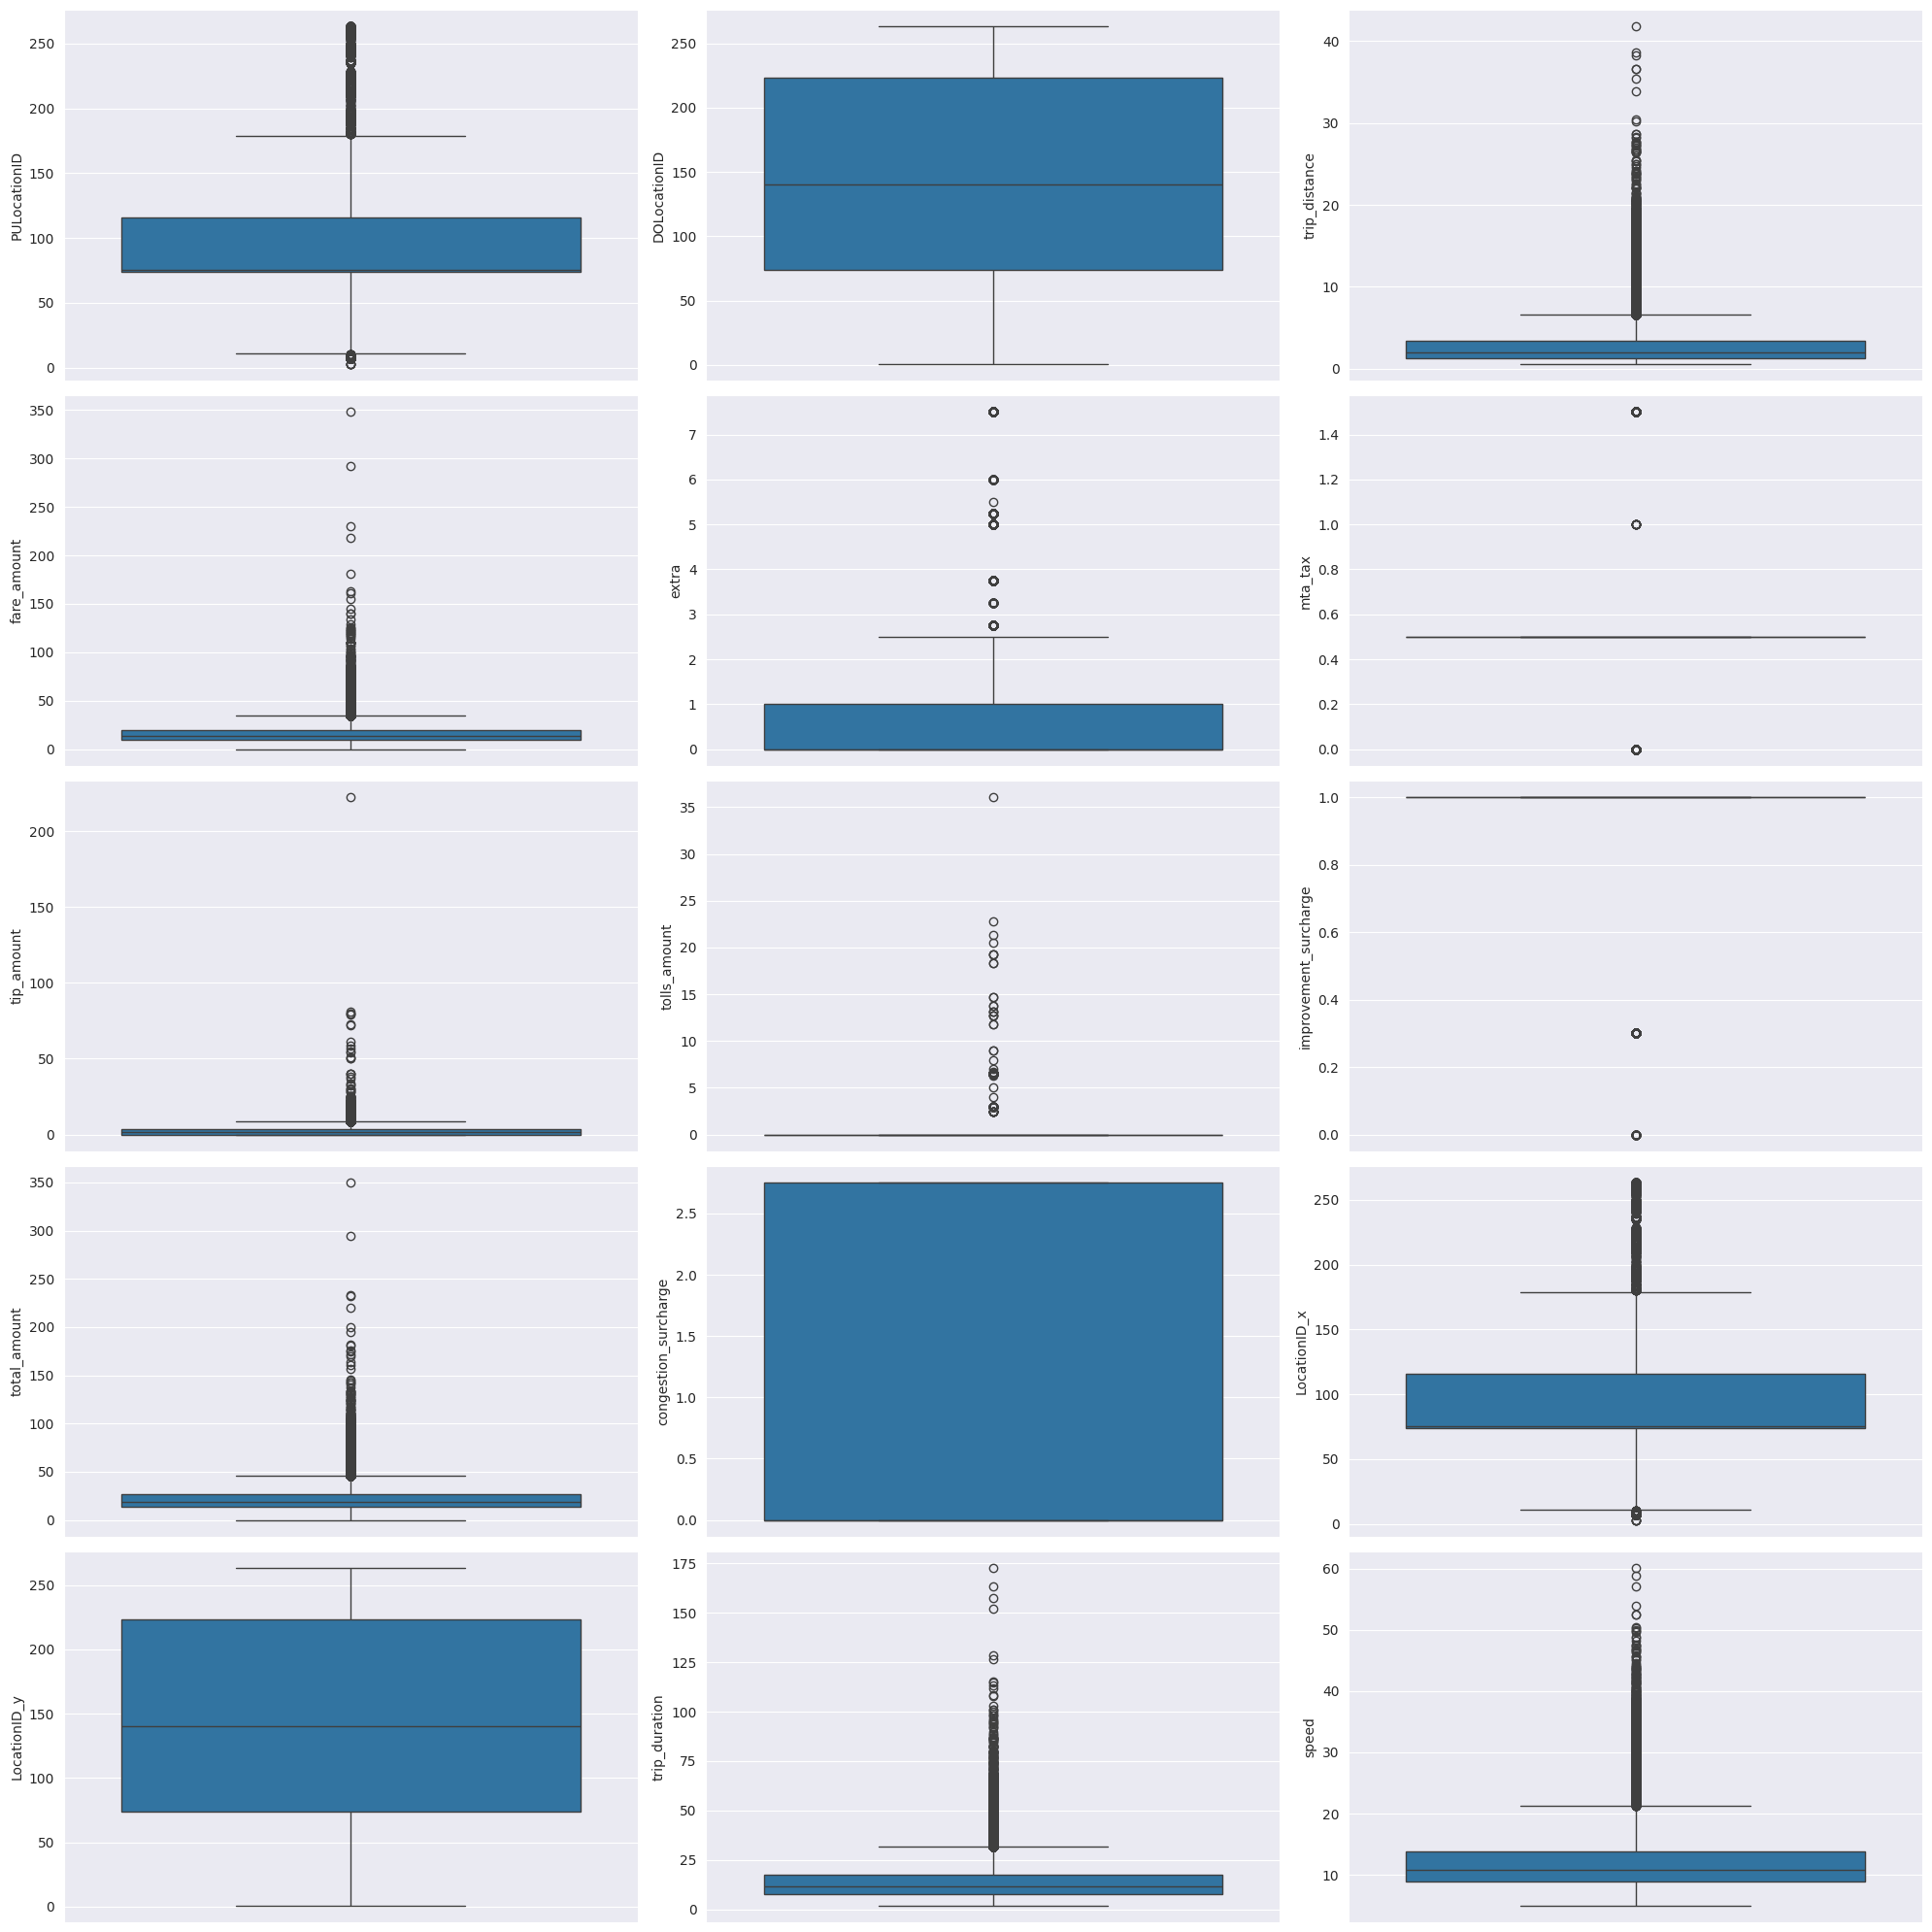

In [667]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (20,20))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,3,posisi)
    sns.boxplot(df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

#### Outliers by Inter Quartile Range (IQR) * 1.5

In [668]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

table_IQR=pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})
table_IQR['persentase_outliers(%)'] = round(table_IQR['jumlah outliers']/len(df)*100,2)
table_IQR.sort_values(by='persentase_outliers(%)', ascending=False).reset_index(drop=True)

kolom  jumlah outliers  persentase_outliers(%)
0                 mta_tax            11706                   19.28
1            PULocationID             8326                   13.71
2            LocationID_x             8326                   13.71
3           trip_distance             5003                    8.24
4                   speed             3872                    6.38
5             fare_amount             3858                    6.36
6   improvement_surcharge             3581                    5.90
7                   extra             3471                    5.72
8            total_amount             3429                    5.65
9           trip_duration             2908                    4.79
10             tip_amount             1603                    2.64
11           tolls_amount             1482                    2.44
12           DOLocationID                0                    0.00
13   congestion_surcharge                0                    0.00
14           LocationID_y                0                    0.00

#### Outliers by Z-Score

In [669]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    std = df[setiap_kolom].std()
    mean = df[setiap_kolom].mean()

    zscore = abs((df[setiap_kolom]-mean)/std) # rumus zscore
    jumlah_outliers = len(zscore[zscore>2])
    list_jumlah_outliers.append(jumlah_outliers)

table_Z=pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})

table_Z['persentase_outliers(%)'] = round(table_Z['jumlah outliers']/len(df)*100,2)
table_Z.sort_values(by='persentase_outliers(%)', ascending=False)

kolom  jumlah outliers  persentase_outliers(%)
5                 mta_tax             7067                   11.64
0            PULocationID             5040                    8.30
11           LocationID_x             5040                    8.30
8   improvement_surcharge             3581                    5.90
14                  speed             3200                    5.27
2           trip_distance             2702                    4.45
9            total_amount             2704                    4.45
3             fare_amount             2621                    4.32
13          trip_duration             2619                    4.31
6              tip_amount             1921                    3.16
4                   extra             1870                    3.08
7            tolls_amount             1482                    2.44
1            DOLocationID                0                    0.00
10   congestion_surcharge                0                    0.00
12           LocationID_y                0                    0.00

Dari 2 metode perhitungan outliers di atas diperoleh bahwa Z Score memberikan flag outliers yang lebih kecil di semua fitur dibandingkan IQR



### Data Corrrelation

<Axes: >

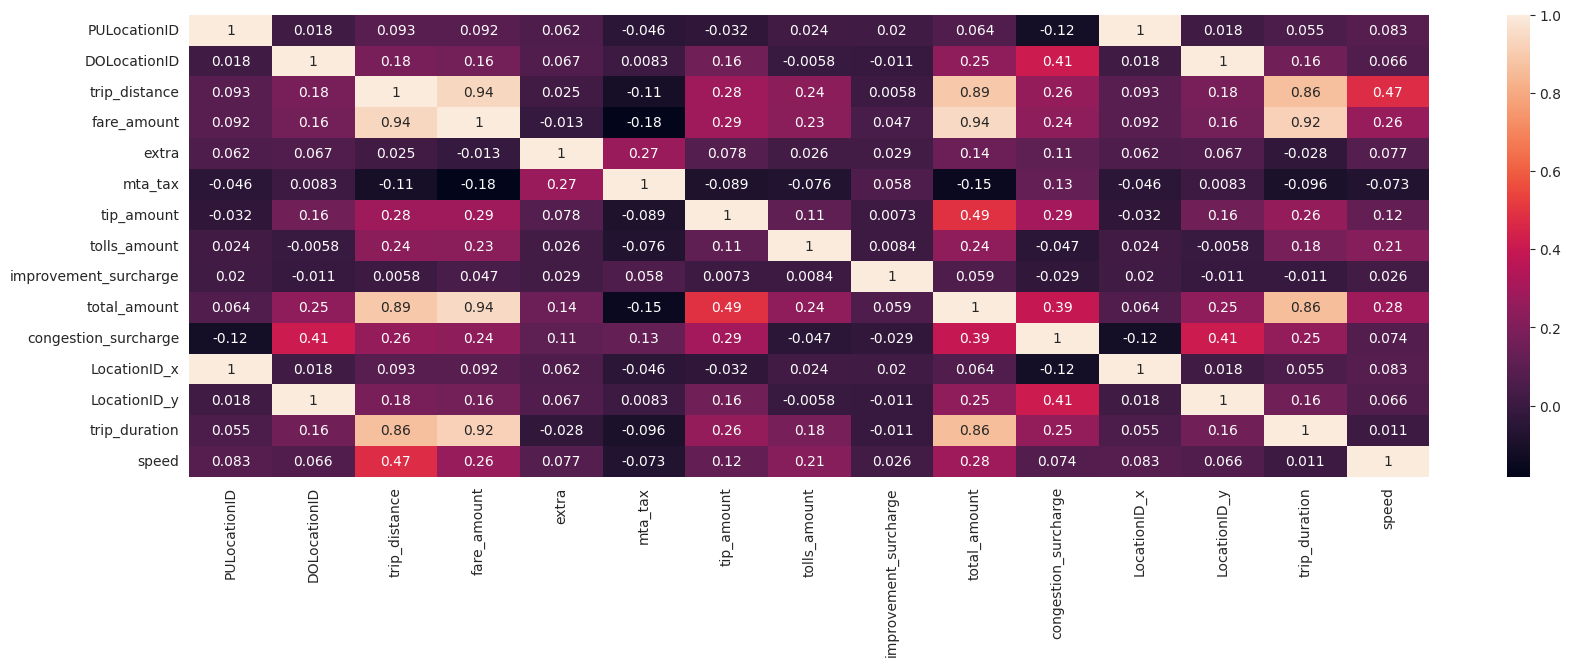

In [670]:
plt.figure(figsize = (20,6))
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

## Explore Data Kategorik

In [671]:
df.describe(include = 'object')

VendorID store_and_fwd_flag     RatecodeID passenger_count  \
count           60708              60708          60708           60708   
unique              2                  3              4               4   
top     VeriFone Inc.                  N  Standard rate             1.0   
freq            53500              56400          59903           52351   

       payment_type    trip_type PU_Borough            PU_Zone  \
count         60708        60708      60708              60708   
unique            6            2          5                191   
top     Credit card  Street-hail  Manhattan  East Harlem North   
freq          36615        60154      36311              12578   

       PU_service_zone DO_Borough            DO_Zone DO_service_zone  
count            60708      60708              60708           60708  
unique               3          6                243               4  
top          Boro Zone  Manhattan  East Harlem South       Boro Zone  
freq             57054      36503               3011           37651

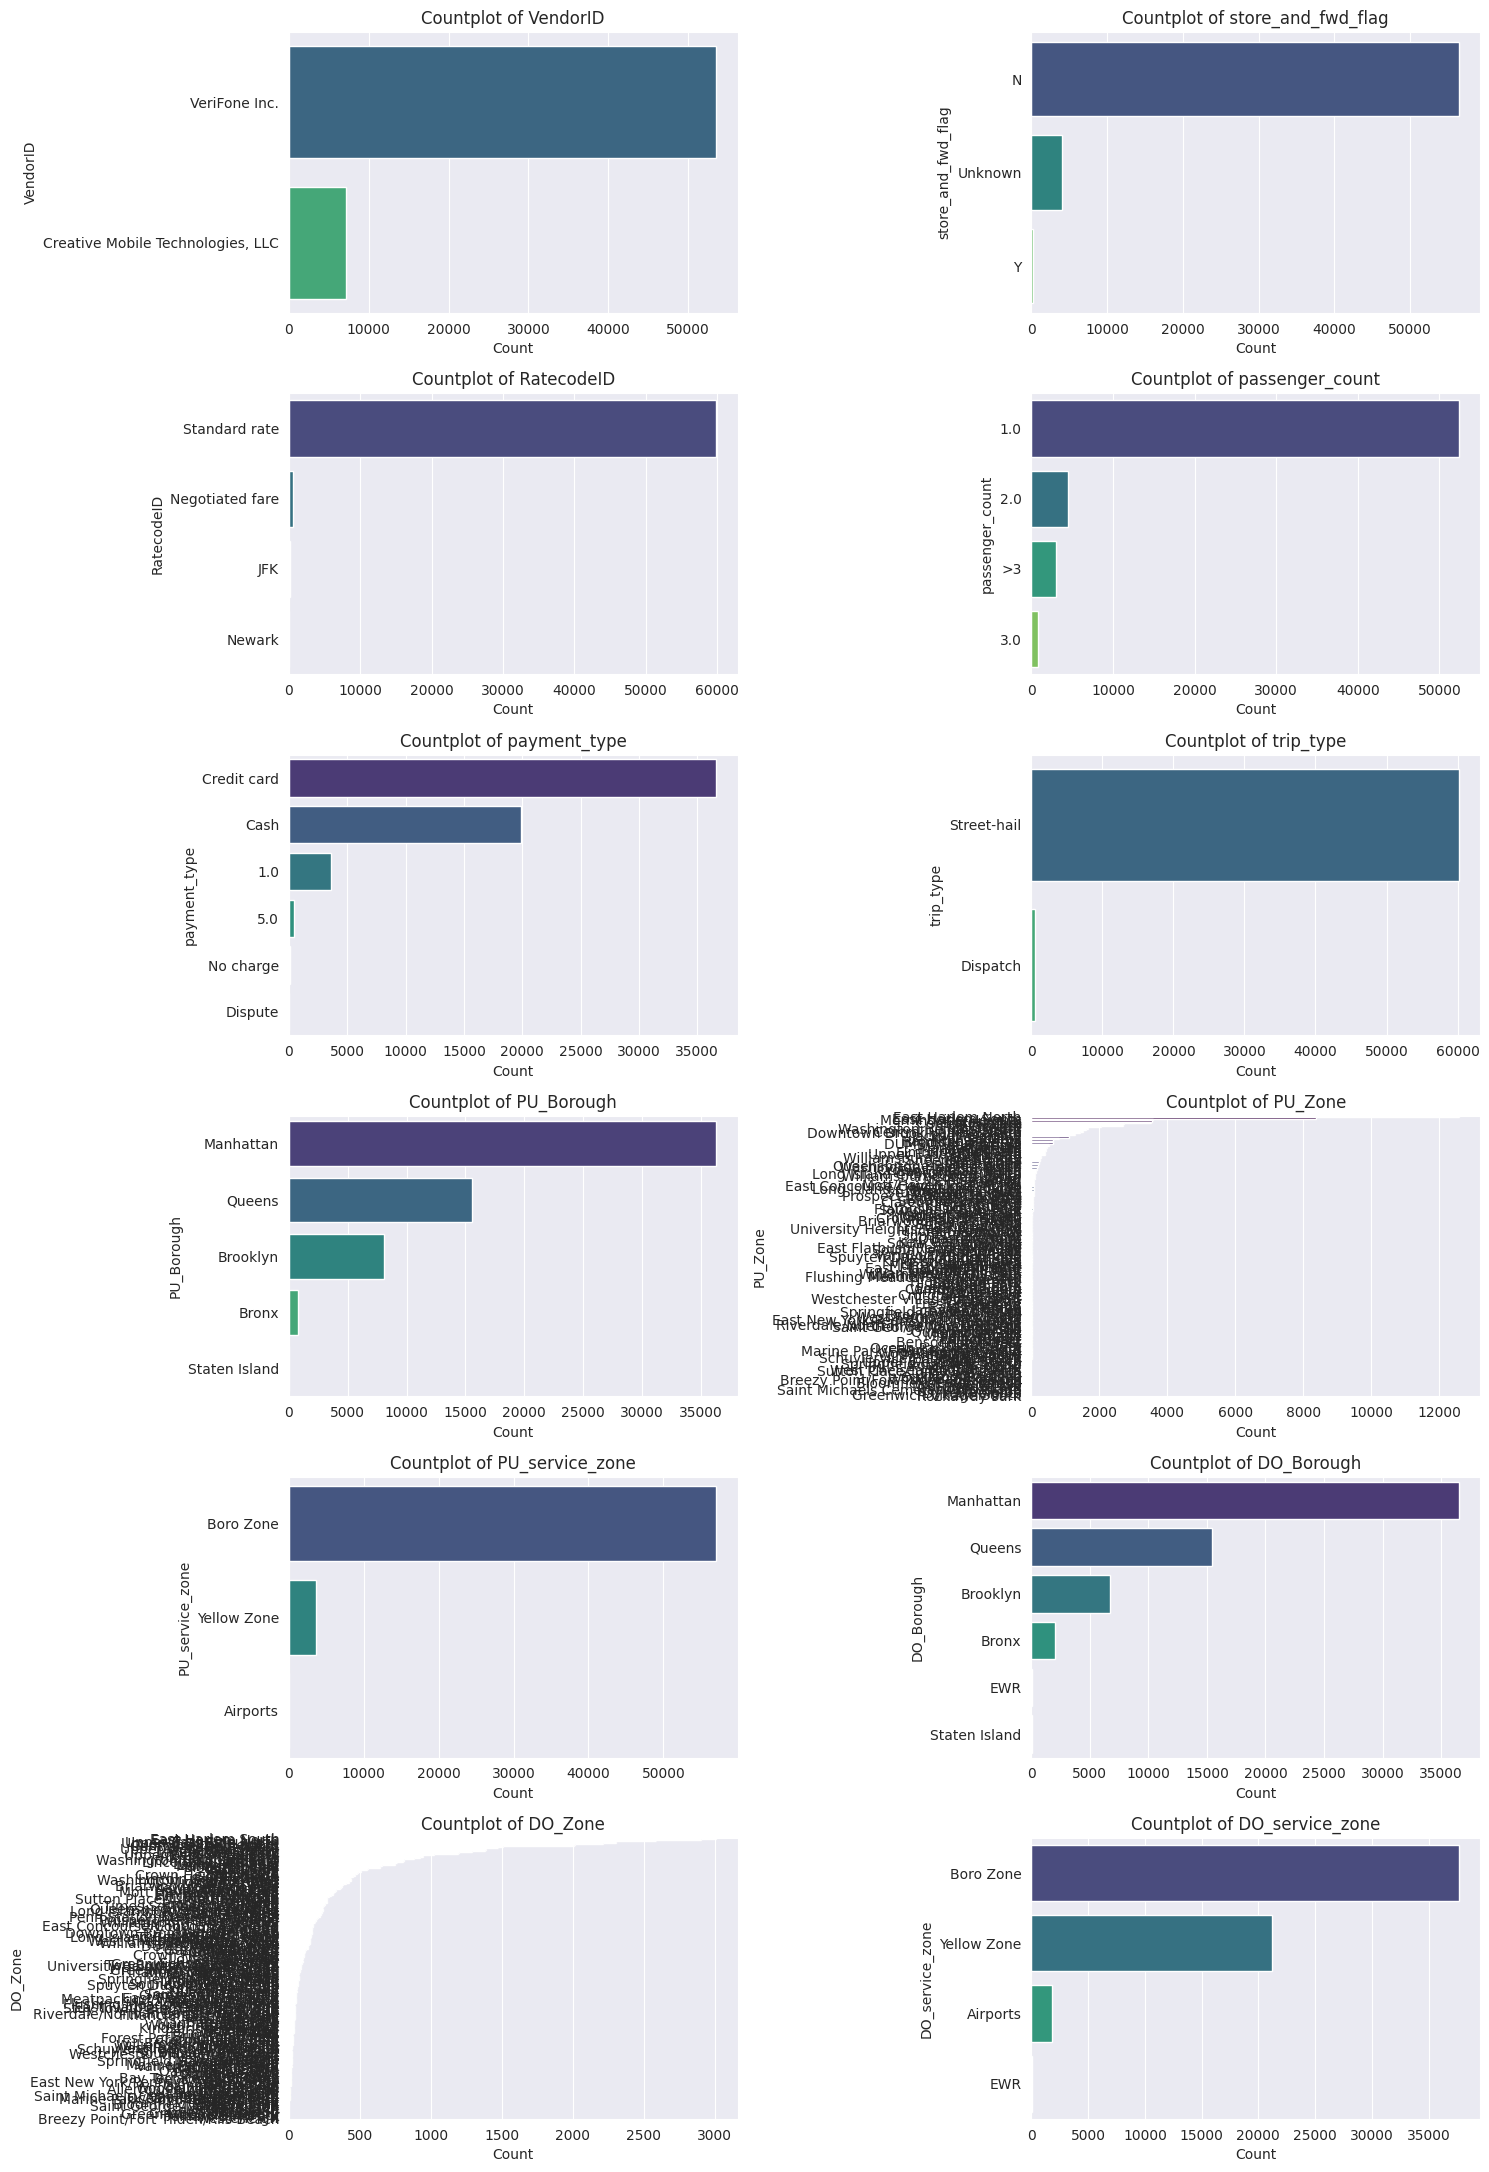

In [672]:
# prompt: membuat warna countplot

kategorik = df.select_dtypes(include = 'object')
plt.figure(figsize = (15, 25))

# Iterasi melalui setiap kolom kategorikal dan buat countplot
for i, col in enumerate(kategorik.columns):
    plt.subplot(7, 2, i + 1)

    # Menghitung jumlah setiap kategori
    value_counts = kategorik[col].value_counts()

    # Membuat countplot dengan warna berbeda untuk setiap kategori
    sns.countplot(y=kategorik[col], order=value_counts.index, palette='viridis')

    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# Data Analysis

## Demand based on time

### Daily Demand in January 2023

In [673]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
time_bins = [0, 5, 11, 15, 20, 24]
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
df['pickup_time'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

In [674]:

trip_monthly = df.groupby(df['lpep_pickup_datetime'].dt.date).agg(trip_bydate=('lpep_pickup_datetime', 'count')).reset_index()
trip_monthly['lpep_pickup_datetime'] = pd.to_datetime(trip_monthly['lpep_pickup_datetime'])
trip_monthly['day_of_week'] = trip_monthly['lpep_pickup_datetime'].dt.day_name()

trip_dayly = trip_monthly.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_dayly['day_cat']= trip_dayly['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

trip_dayly_cat = trip_dayly.groupby('day_cat').agg(trip_bycat=('trip_byday', 'sum')).reset_index()

trip_merge = pd.merge(trip_monthly, trip_dayly, on='day_of_week', how='left')
trip_merge = pd.merge(trip_merge, trip_dayly_cat, on='day_cat', how='left')

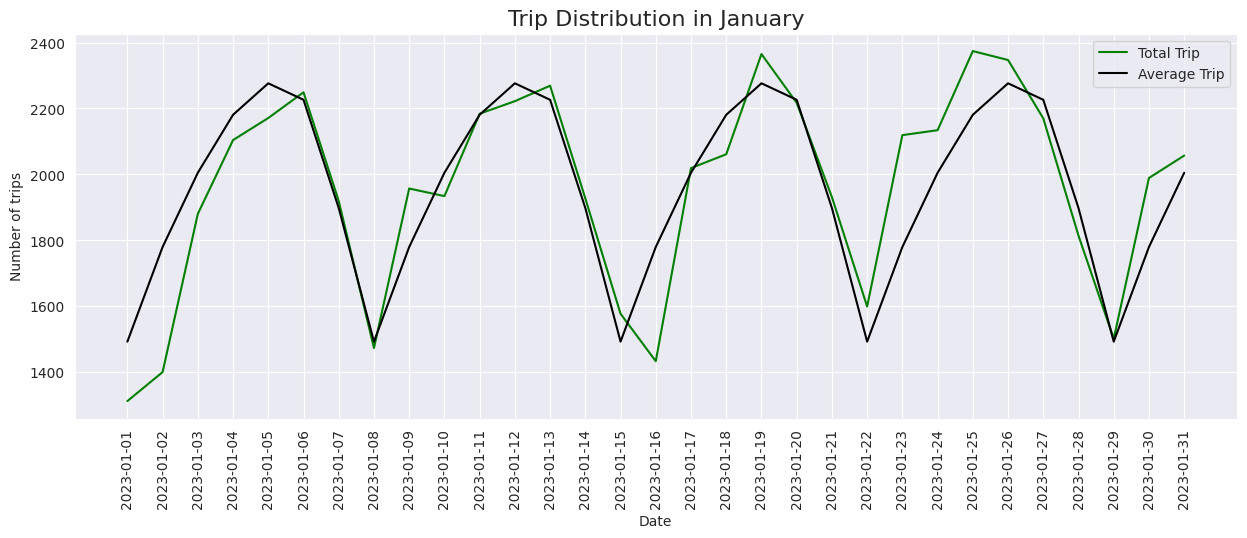

In [675]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime',
             y='trip_bydate',
             color='green',
             label = 'Total Trip',
             ci=None)

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime',
             y='avg_trip',
             color='black',
             label = 'Average Trip',
             ci=None)

plt.title('Trip Distribution in January', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(trip_monthly['lpep_pickup_datetime'], rotation=90)

plt.show()

Insight:
1. Jumlah perjalanan taxi tertinggi terdapat di tanggal 25 januari 2023 dan yang terendah di tanggal 1-januari 2023
2. Dari grafik di atas ditemukan pola yang berulang setiap 7 hari sehingga dapat disimpulkan bahwa jumlah perjalanan di hari yang sama tidak ada perbedaan yang cukup signifikan

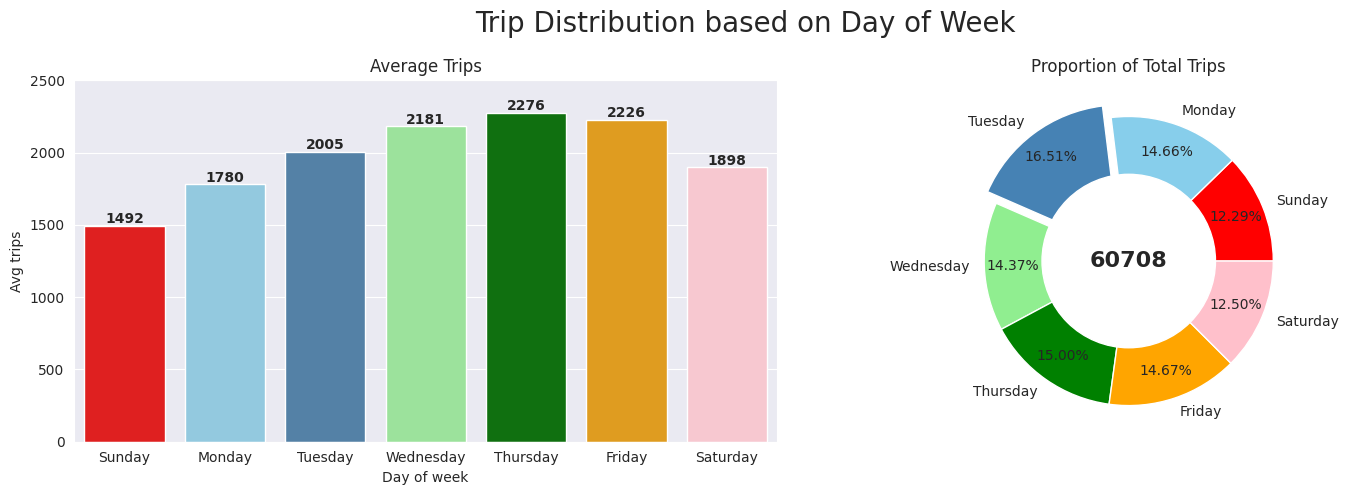

In [676]:
def palette(day):
  if day=='Sunday':
    return 'red'
  elif day=='Monday':
    return 'skyblue'
  elif day=='Tuesday':
    return 'steelblue'
  elif day=='Wednesday':
    return 'lightgreen'
  elif day=='Thursday':
    return 'green'
  elif day=='Friday':
    return 'orange'
  elif day=='Saturday':
    return 'pink'


plt.figure(figsize=(15,5))

plt.suptitle('Trip Distribution based on Day of Week', fontsize=20)
plt.subplot(1,2,1)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(),
                   y=trip_merge['avg_trip'].unique().tolist(),
                   palette=[palette(day) for day in trip_merge['day_of_week'].unique().tolist()])
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 20
    label = "{:.0f}".format(trip_merge['avg_trip'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center',fontweight='bold')

plt.title('Average Trips')
plt.xlabel('Day of week')
plt.ylabel('Avg trips')
plt.yticks(np.arange(0, 2501, 500))

plt.subplot(1,2,2)
plt.pie(x=trip_merge['trip_byday'].unique().tolist(),
        labels=trip_merge['day_of_week'].unique().tolist(),
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0,0,0.1,0,0,0,0),
        colors=[palette(day) for day in trip_merge['day_of_week'].unique().tolist()])
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, trip_merge['trip_byday'].unique().sum(), ha='center', va='center', fontsize=16,fontweight='bold')
plt.title('Proportion of Total Trips')

plt.tight_layout()
plt.show()

Insight:
-Berdasarkan rata-rata banyaknya perjalanan perhari, perjalanan perhari tertinggi terjadi pada hari kamis mencapai 2275 perjalanan perhari
-Namun secara total proporsi tertinggi total trip selama bulan januari yaitu hari Rabu sebesar 16% dari total banyaknya perjalanan
-Dapat dilihat juga bahwa jumlah perjalanan weekdays secara konsisten naik dan menurun ketika memasuki weekend

### Demand by Hour

In [677]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cross = pd.crosstab(index=df['lpep_pickup_datetime'].dt.day_name(), columns=df['lpep_pickup_datetime'].dt.hour, margins=True).reindex(day_order)
cross.columns.name = None
cross.index.name = 'Day of Week'

melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day of Week', var_name='hour', value_name='trips')
cross

0    1    2    3    4   5    6    7    8    9  ...   15   16  \
Day of Week                                                   ...             
Sunday       281  264  221  181  137  74   59   96  123  217  ...  562  539   
Monday       110   67   49   65   52  51  134  375  418  482  ...  695  704   
Tuesday       85   50   44   35   21  51  186  531  648  647  ...  722  784   
Wednesday     84   66   27   25   17  43  165  406  510  518  ...  651  689   
Thursday      88   61   41   25   31  51  163  424  505  544  ...  658  699   
Friday       135   81   38   36   28  42  140  429  463  469  ...  695  688   
Saturday     210  176  122  103   84  45   46  108  196  252  ...  581  567   

              17   18   19   20   21   22   23    All  
Day of Week                                            
Sunday       507  518  442  379  293  193  159   7462  
Monday       704  724  552  378  305  218  151   8898  
Tuesday      775  796  629  456  323  242  163  10024  
Wednesday    747  733  601  408  279  211  152   8723  
Thursday     760  794  543  445  309  240  165   9105  
Friday       710  718  568  421  321  290  251   8905  
Saturday     510  533  475  419  324  315  301   7591  

[7 rows x 25 columns]

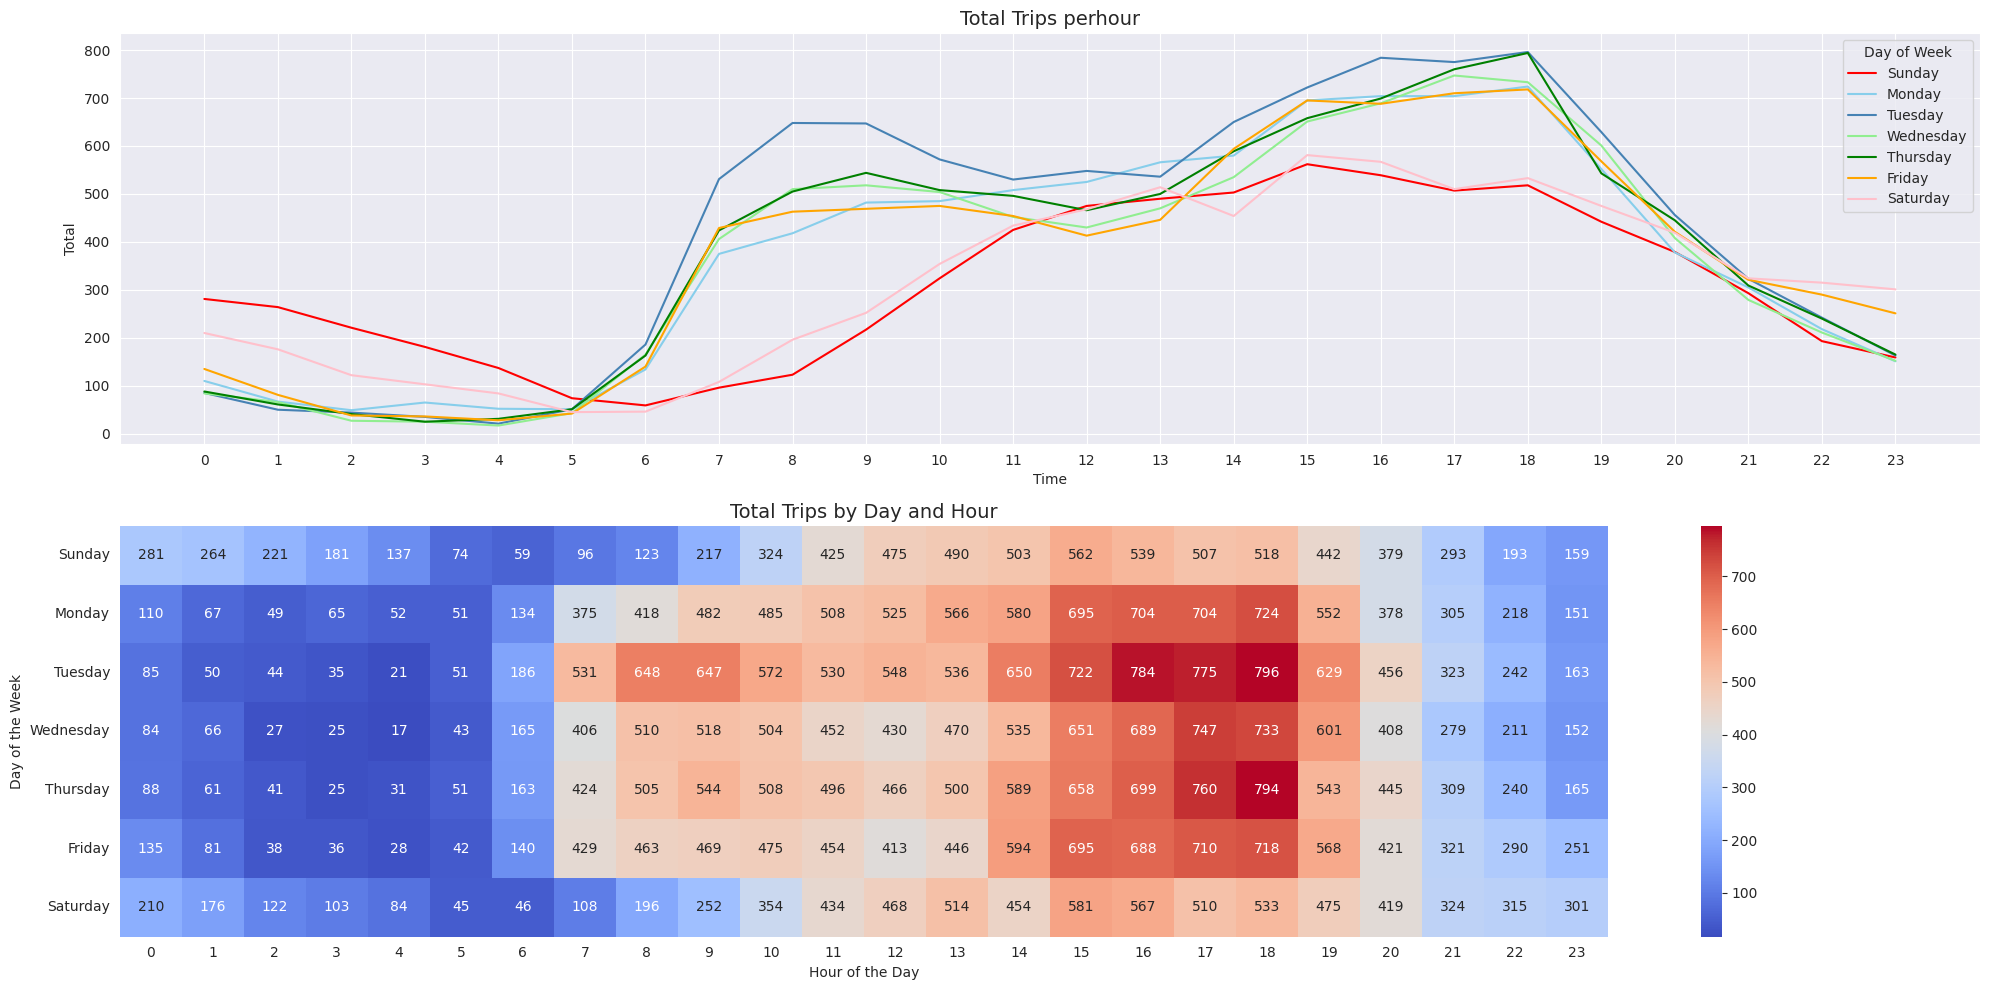

In [678]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
sns.lineplot(data=melted_cross,
             x='hour',
             y='trips',
             hue='Day of Week',
             palette=[palette(day) for day in trip_merge['day_of_week'].unique().tolist()])

plt.title('Total Trips perhour', fontsize=14)
plt.xlabel('Time')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Total')

plt.subplot(2, 1, 2)
sns.heatmap(cross.iloc[:,:-1], cmap="coolwarm", annot=True, fmt='d')
plt.title('Total Trips by Day and Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

Insights:
- Jumlah demand tertinggi di bulan januari berdasarkan hari dan jam terjadi di hari selasa jam 18.00 dengan jumalah perjalanan sebanyak 798 dan yang terendah sebanyak 17 perjalanan terjadi pada hari rabu jam 04.00
- Pada weekdays demand mulai meningkat mulai jam 07.00 s/d 19.00 dengan puncak keramaian terjadi di jam 15.00 s/d 18.00
- Sementara untuk weekend demand mulai meningkat pada pukul 11 s/d 20.00 engan puncak keramaian terjadi di jam 15.00 s/d 18.00

## Demand based on Pick Up Borough & Pick Up Zone

In [679]:
agg_borough = df.groupby('PU_Borough').agg(count=('PU_Borough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone = df.groupby('PU_Zone').agg(count=('PU_Zone', 'count')).sort_values(by='count', ascending=False).reset_index()

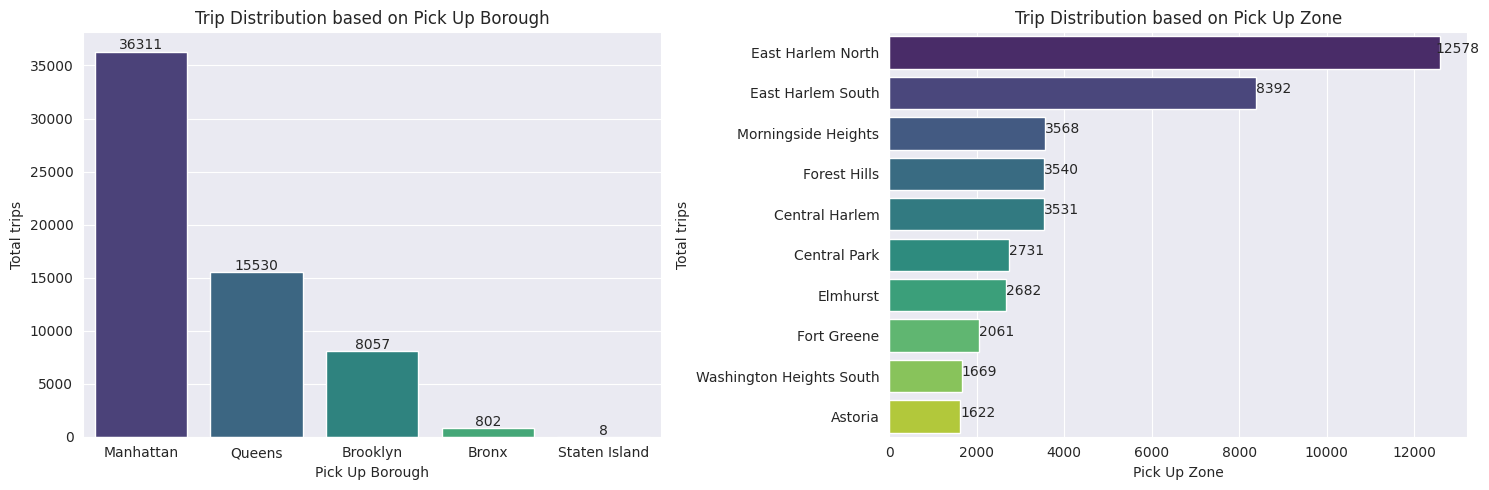

In [680]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
bars = sns.barplot(x=agg_borough['PU_Borough'],
                   y=agg_borough['count'],
                   palette='viridis')
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=agg_zone.head(10),
                   y='PU_Zone',
                   x='count',
                   palette='viridis')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Zone')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')

plt.tight_layout()
plt.show()

Insights:
- Berdasarkan pick up Borough, demand tertinggi terjadi di Manhattan dengan total 36.392 perjalanan dan yang terendah terjadi di Staten Island dengan 9 perjalanan
- Berdasarkan pick up zone, demand tertinggi terjadi di East Harlem dengan total 12,592 perjalanan dan yang terendah terjadi di Astoria dengan total 1.652 perjalanan

## Proporsi RatecodeID, Trip Type dan Payment Type

In [681]:
ratecode = df.groupby('RatecodeID').agg(count=('RatecodeID', 'count')).sort_values(by='count', ascending=False).reset_index()
ratecode['RatecodeID'] = ratecode['RatecodeID'].apply(lambda x: x if x == 'Standard rate' else 'Other')
ratecode = ratecode.groupby('RatecodeID').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

payment = df.groupby('payment_type').agg(count=('payment_type', 'count')).sort_values(by='count', ascending=False).reset_index()
payment['payment_type'] = payment['payment_type'].apply(lambda x: x if x == 'Credit card' or x == 'Cash' else 'Other')
payment = payment.groupby('payment_type').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

triptype = df.groupby('trip_type').agg(count=('trip_type', 'count')).sort_values(by='count', ascending=False).reset_index()


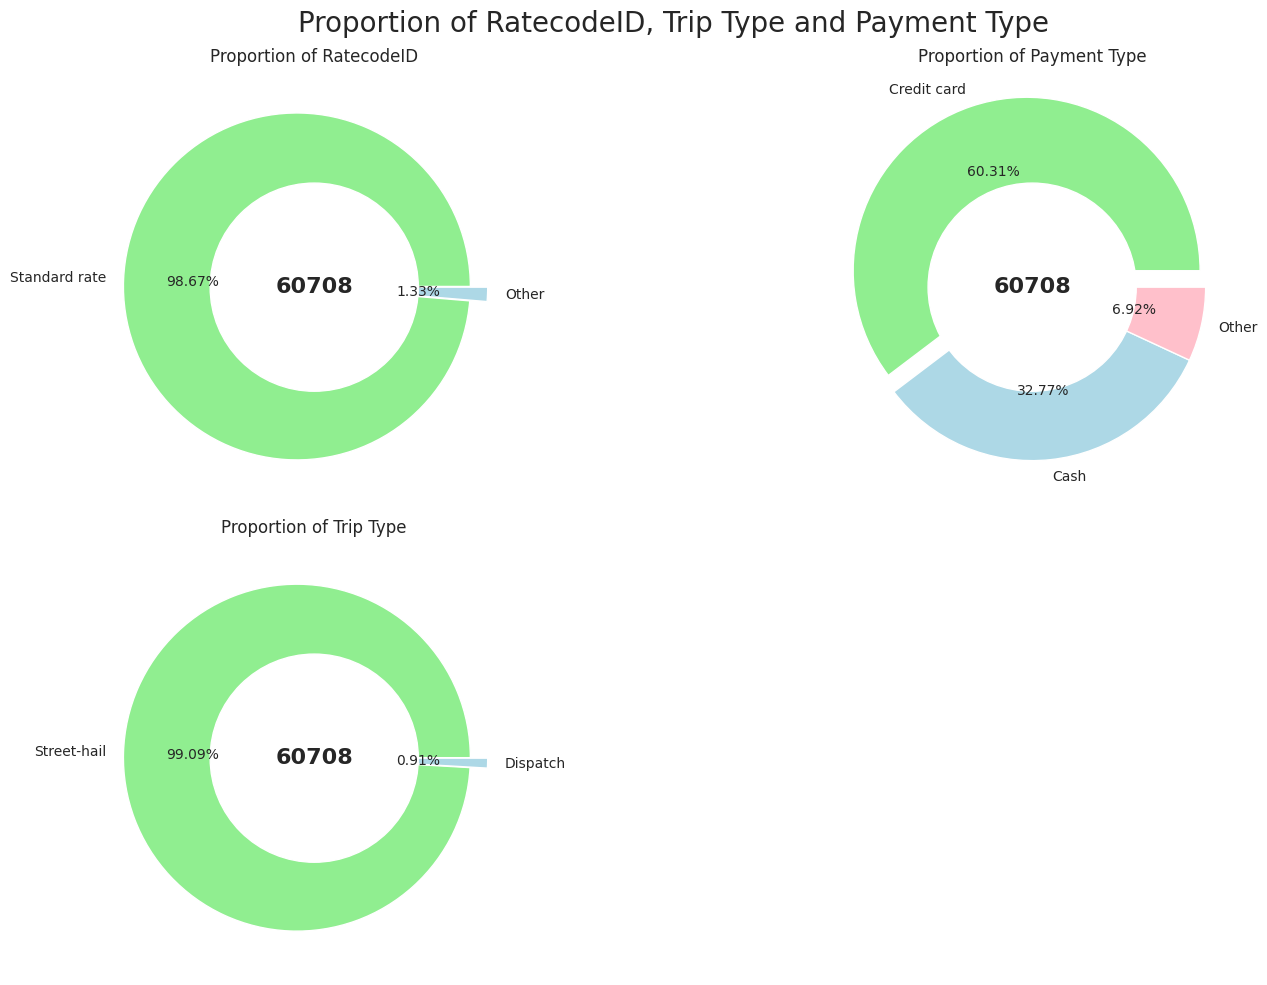

In [682]:
plt.figure(figsize=(15,10))
plt.suptitle('Proportion of RatecodeID, Trip Type and Payment Type', fontsize=20)

plt.subplot(2,2,1)
plt.pie(x=ratecode['count'],
        labels=ratecode['RatecodeID'],
        autopct='%1.2f%%',
        explode=(0.1,0),
        colors=['lightgreen', 'lightblue'])
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, ratecode['count'].sum(), ha='center', va='center', fontsize=16,fontweight='bold')
plt.title('Proportion of RatecodeID')

plt.subplot(2,2,2)
plt.pie(x=payment['count'],
        labels=payment['payment_type'],
        autopct='%1.2f%%',
        explode=(0.1,0,0),
        colors=['lightgreen', 'lightblue', 'pink'])
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, payment['count'].sum(), ha='center', va='center', fontsize=16,fontweight='bold')
plt.title('Proportion of Payment Type')

plt.subplot(2,2,3)
plt.pie(x=triptype['count'],
         labels=triptype['trip_type'],
         autopct='%1.2f%%',
         explode=(0.1,0),
         colors=['lightgreen', 'lightblue'])
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, triptype['count'].sum(), ha='center', va='center', fontsize=16,fontweight='bold')
plt.title('Proportion of Trip Type')


plt.tight_layout()
plt.show()

Insights:
Perjalanan taxi di dominasi dengan jenis tarif standard, metode pembayaran didominasi Credit Card dan Trip type di dominasi Street-hail

## Demand by Distance & Duration

In [683]:
distance = df.groupby('distance_bins').agg(count=('distance_bins', 'count')).sort_values(by='count', ascending=False).reset_index()
duration = df.groupby('duration_bins').agg(count=('duration_bins', 'count')).sort_values(by='count', ascending=False).reset_index()
duration

duration_bins  count
0  11-20 minutes  25780
1    <10 minutes  23873
2  21-30 minutes   7576
3    >30 minutes   3479

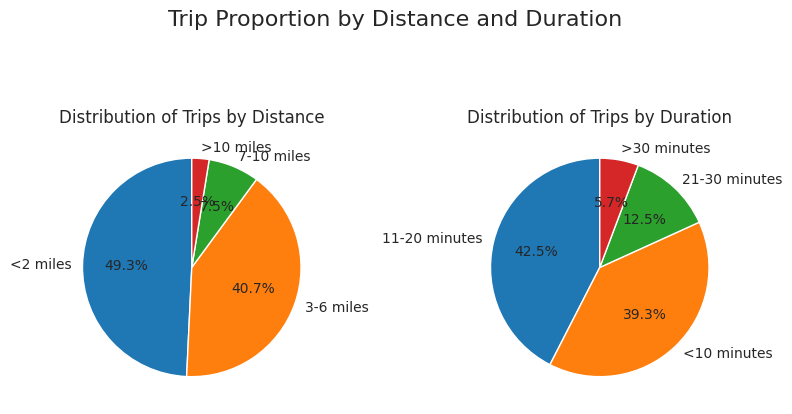

In [684]:
plt.figure(figsize=(8, 5))
plt.suptitle('Trip Proportion by Distance and Duration', fontsize=16)
plt.subplot(1,2,1)
plt.pie(x=distance['count'],
        labels=distance['distance_bins'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Trips by Distance')
plt.subplot(1,2,2)
plt.pie(x=duration['count'],
        labels=duration['duration_bins'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Trips by Duration')
plt.tight_layout()
plt.show()



Insights:
-Trip distance di dominasi dengan perjalanan jarak pendek yaitu kurang dari 2 miles dan 3-6 miles
- Trip distance ini linear dengan waktu tempuh (trip duration) yang di dominasi dengan kurang dari 10 menit dan 11-20 menit.




## Distribusi Fare Amount

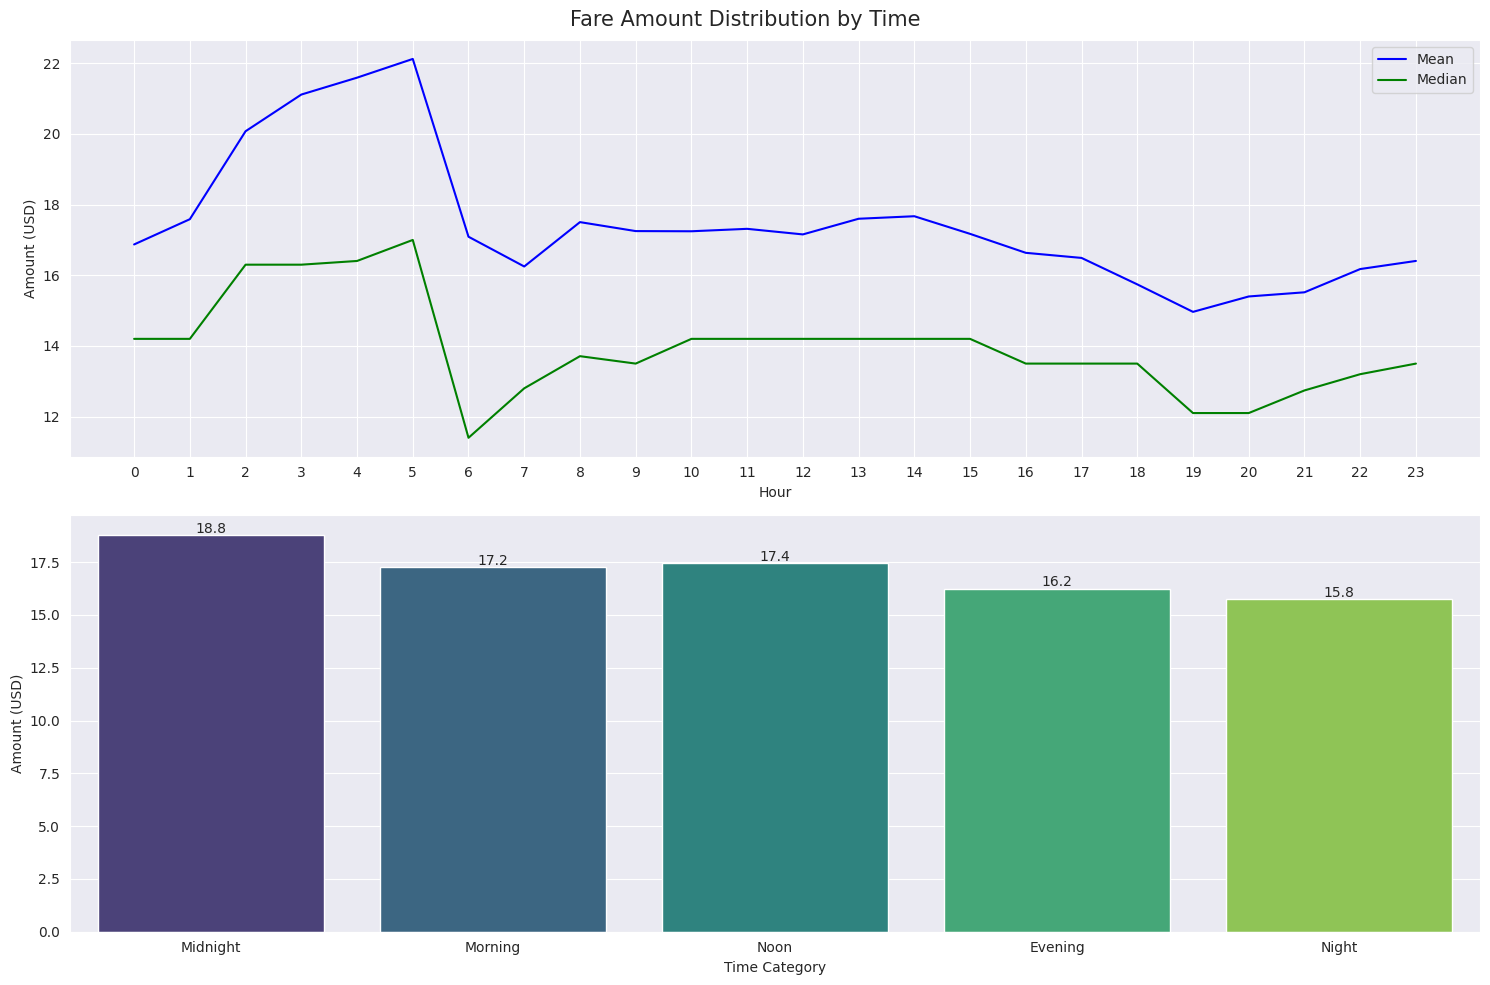

In [685]:
sort_time = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
amount_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour).agg(total_fare_amount=('fare_amount', 'sum'),
                                                                    avg_fare_amount=('fare_amount', 'mean'),
                                                                    median_fare_amount=('fare_amount', 'median')).reset_index()
amount_by_time = df.groupby('pickup_time').agg(total_fare_amount=('fare_amount', 'sum'),
                                               avg_fare_amount=('fare_amount', 'mean'),
                                               median_fare_amount=('fare_amount', 'median')).reindex(sort_time).reset_index().round(2)

plt.figure(figsize=(15,10))
plt.suptitle('Fare Amount Distribution by Time', fontsize=15)

plt.subplot(2,1,1)
sns.lineplot(data=amount_by_hour,
             x='lpep_pickup_datetime',
             y='avg_fare_amount',
             color='blue',
             label = 'Mean')
sns.lineplot(data=amount_by_hour,
             x='lpep_pickup_datetime',
             y='median_fare_amount',
             color='green',
             label = 'Median')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Amount (USD)')


plt.subplot(2,1,2)
bars = sns.barplot(data=amount_by_time,
                   x='pickup_time',
                   y='avg_fare_amount',
                   palette='viridis')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.3
    label = "{:.1f}".format(amount_by_time['avg_fare_amount'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center', va='center')
plt.xlabel('Time Category')
plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

Insight:
- Harga rata-rata dalam sekali perjalanan di tengah malam yaitu pukul 00:00 - 05:00 relatif lebih mahal di bandingnya yang lainnya

- Harga rata-rata dalam sekali perjalanan terendah yaitu di malam hari pada pukul 20:00 - 00.00

- Sementara di waktu yang lainnya seperti pagi, siang, dan sore relatif sama.

In [686]:
trip_amount_dist1 = df.groupby(['PU_Borough']).agg(trip_count=('PU_Borough', 'count'),
                                                        total_fare=('fare_amount', 'sum'),
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'),
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)

trip_amount_dist1

PU_Borough  trip_count  total_fare  avg_fare  total_tip  avg_tip
2      Manhattan       36311   560839.05     15.45   86556.87     2.38
3         Queens       15530   273275.28     17.60   25906.19     1.67
1       Brooklyn        8057   168532.66     20.92   24908.81     3.09
0          Bronx         802    17138.02     21.37     780.43     0.97
4  Staten Island           8      150.20     18.77      12.26     1.53

In [687]:
trip_amount_dist = df.groupby(['PU_Zone', 'DO_Zone']).agg(trip_count=('PU_Zone', 'count'),
                                                        total_fare=('fare_amount', 'sum'),
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'),
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)
route = trip_amount_dist['PU_Zone'] + " - " + trip_amount_dist['DO_Zone']
trip_amount_dist.insert(0, 'Route', route)
trip_amount_dist.drop(columns=['PU_Zone', 'DO_Zone'], inplace=True)
trip_amount_dist

Route  trip_count  total_fare  \
1627      East Harlem North - East Harlem South        1948    19334.44   
1771      East Harlem South - East Harlem North        1391    12217.47   
1713  East Harlem North - Upper East Side North        1178    15288.73   
2341                Forest Hills - Forest Hills        1007     9772.56   
1678    East Harlem North - Morningside Heights         930    11359.51   
1610         East Harlem North - Central Harlem         884     7684.10   
1715  East Harlem North - Upper West Side North         692    11204.63   
1611   East Harlem North - Central Harlem North         687     7030.47   
1732         East Harlem North - Yorkville West         673     9057.31   
1612           East Harlem North - Central Park         624     7690.85   

      avg_fare  total_tip  avg_tip  
1627      9.93    3040.66     1.56  
1771      8.78    1810.52     1.30  
1713     12.98    3122.55     2.65  
2341      9.70    1194.83     1.19  
1678     12.21    1865.93     2.01  
1610      8.69    1107.35     1.25  
1715     16.19    2133.68     3.08  
1611     10.23     652.25     0.95  
1732     13.46    1926.47     2.86  
1612     12.33    1395.22     2.24

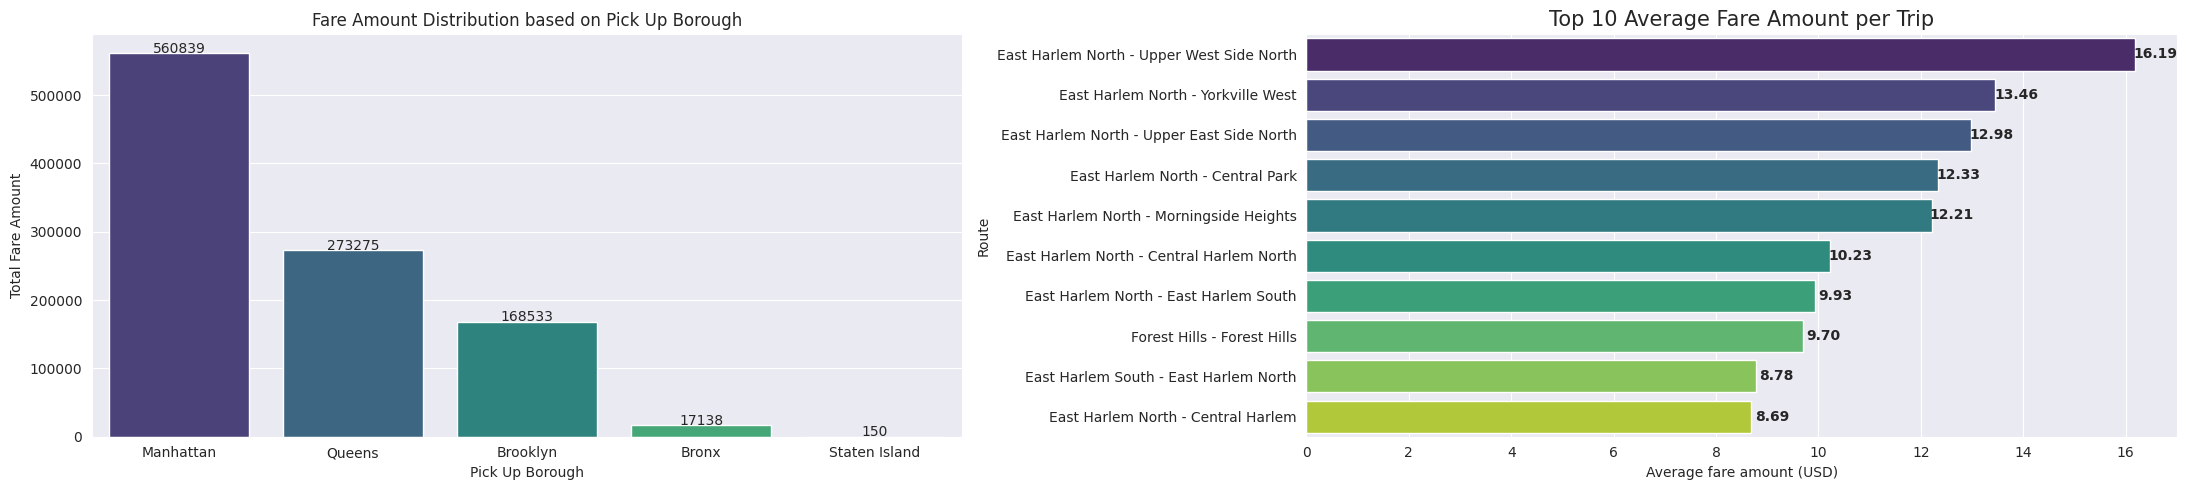

In [688]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
data1 = trip_amount_dist1.sort_values(by='avg_fare', ascending=False)
bars = sns.barplot(x=trip_amount_dist1['PU_Borough'],
                   y=trip_amount_dist1['total_fare'],
                   palette='viridis')
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(trip_amount_dist1['total_fare'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Fare Amount Distribution based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total Fare Amount')


plt.subplot(1,2,2)
data = trip_amount_dist.sort_values(by='avg_fare', ascending=False)
bars = sns.barplot(data=data,
                   y='Route',
                   x='avg_fare',
                   palette='viridis')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.4
    label = "{:.2f}".format(data['avg_fare'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center',fontweight='bold')
plt.xlabel('Average fare amount (USD)')
plt.ylabel('Route')
plt.title('Top 10 Average Fare Amount per Trip', fontsize=15)

plt.tight_layout()
plt.show()

Total fare amount tertinggi berdasarkan PU Borough dipegang oleh Manhattan Kemudian dari 10 perjalanan dengan rata-rata Fare Amount tertinggi rute East Harlem North - Upper West Side North memiliki rata-rata Fair Amount tertinggi dengan 16,18 Dollar

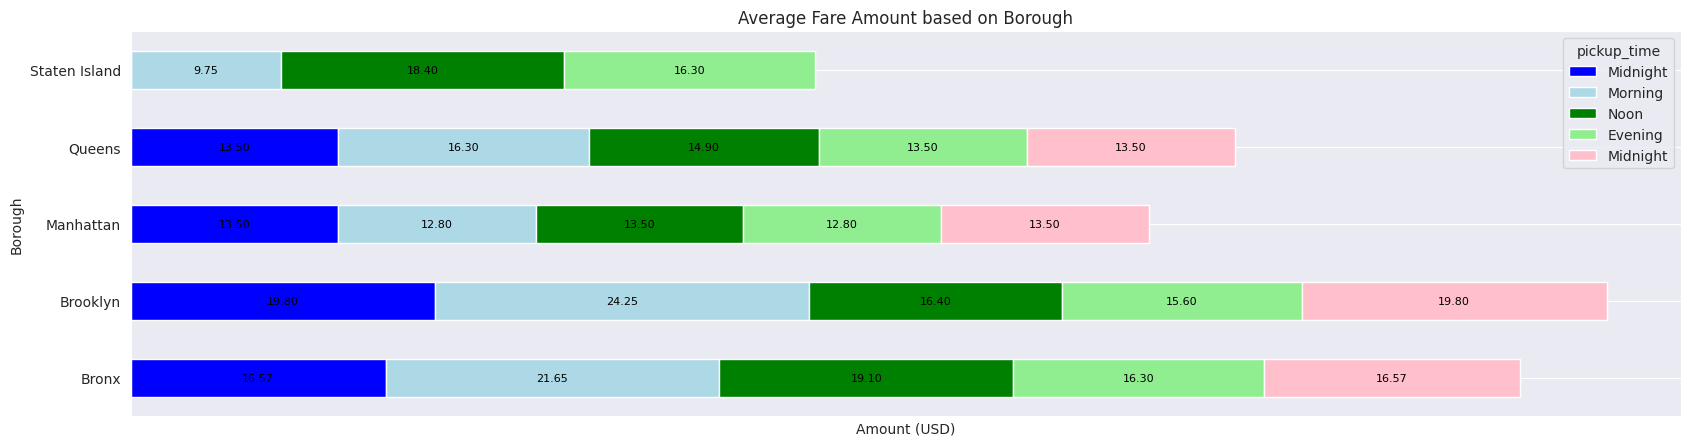

In [689]:
borough_amount_stack = df.pivot_table(index='PU_Borough', columns='pickup_time', values='fare_amount', aggfunc='median').fillna(0)
borough_amount_stack = borough_amount_stack[['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']]
borough_tip = df.groupby(['PU_Borough', 'pickup_time']).agg(median_tip=('tip_amount', 'median')).sort_values(by='median_tip', ascending=False).reset_index().round(2)

ax = borough_amount_stack.plot(kind='barh', stacked=True, color=['blue','lightblue','green','lightgreen','pink'], figsize=(20,5))
plt.title('Average Fare Amount based on Borough')
plt.xlabel('Amount (USD)')
plt.ylabel('Borough')
plt.xticks([])
for idx, rect in enumerate(ax.patches):
    width = rect.get_width()
    if width > 0:
        y = rect.get_y() + rect.get_height() / 2
        cum_width_prev_segments = sum(borough_amount_stack.iloc[idx % len(borough_amount_stack), :idx // len(borough_amount_stack)])
        x = cum_width_prev_segments + width / 2
        plt.text(x, y, f"{width:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.show()

In [690]:
df

VendorID lpep_pickup_datetime  \
0                          VeriFone Inc.  2023-01-01 00:26:10   
1                          VeriFone Inc.  2023-01-01 00:51:03   
3      Creative Mobile Technologies, LLC  2023-01-01 00:13:14   
4      Creative Mobile Technologies, LLC  2023-01-01 00:33:04   
5                          VeriFone Inc.  2023-01-01 00:53:31   
...                                  ...                  ...   
68206                      VeriFone Inc.  2023-01-31 22:29:00   
68207                      VeriFone Inc.  2023-01-31 22:40:00   
68208                      VeriFone Inc.  2023-01-31 23:46:00   
68209                      VeriFone Inc.  2023-01-31 23:01:00   
68210                      VeriFone Inc.  2023-01-31 23:51:00   

      lpep_dropoff_datetime store_and_fwd_flag     RatecodeID  PULocationID  \
0       2023-01-01 00:37:11                  N  Standard rate         166.0   
1       2023-01-01 00:57:49                  N  Standard rate          24.0   
3       2023-01-01 00:19:03                  N  Standard rate          41.0   
4       2023-01-01 00:39:02                  N  Standard rate          41.0   
5       2023-01-01 01:11:04                  N  Standard rate          41.0   
...                     ...                ...            ...           ...   
68206   2023-01-31 22:42:00            Unknown  Standard rate          49.0   
68207   2023-01-31 22:48:00            Unknown  Standard rate          10.0   
68208   2023-02-01 00:02:00            Unknown  Standard rate          66.0   
68209   2023-01-31 23:19:00            Unknown  Standard rate         225.0   
68210   2023-02-01 00:07:00            Unknown  Standard rate         256.0   

       DOLocationID passenger_count  trip_distance  fare_amount  ...  \
0             143.0             1.0           2.58        14.90  ...   
1              43.0             1.0           1.81        10.70  ...   
3             238.0             1.0           1.30         6.50  ...   
4              74.0             1.0           1.10         6.00  ...   
5             262.0             1.0           2.78        17.70  ...   
...             ...             ...            ...          ...  ...   
68206          62.0             1.0           2.31        15.70  ...   
68207         205.0             1.0           2.14         4.41  ...   
68208          37.0             1.0           3.44        16.53  ...   
68209         189.0             1.0           3.03        14.98  ...   
68210         140.0             1.0           5.82        23.65  ...   

       DO_Borough                DO_Zone  DO_service_zone  distance_bins  \
0       Manhattan    Lincoln Square West      Yellow Zone      3-6 miles   
1       Manhattan           Central Park      Yellow Zone       <2 miles   
3       Manhattan  Upper West Side North      Yellow Zone       <2 miles   
4       Manhattan      East Harlem North        Boro Zone       <2 miles   
5       Manhattan         Yorkville East      Yellow Zone      3-6 miles   
...           ...                    ...              ...            ...   
68206    Brooklyn    Crown Heights South        Boro Zone      3-6 miles   
68207      Queens           Saint Albans        Boro Zone      3-6 miles   
68208    Brooklyn         Bushwick South        Boro Zone      3-6 miles   
68209    Brooklyn       Prospect Heights        Boro Zone      3-6 miles   
68210   Manhattan        Lenox Hill East      Yellow Zone      3-6 miles   

       trip_duration  duration_bins fare_amount_bins  speed  speed_bins  \
0              11.02  11-20 minutes             <20$  14.05   11-20 mph   
1               6.77    <10 minutes             <20$  16.04   11-20 mph   
3               5.82    <10 minutes             <20$  13.40   11-20 mph   
4               5.97    <10 minutes             <20$  11.06   11-20 mph   
5              17.55  11-20 minutes             <20$   9.50     <10 mph   
...              ...            ...              ...    ...         ...   

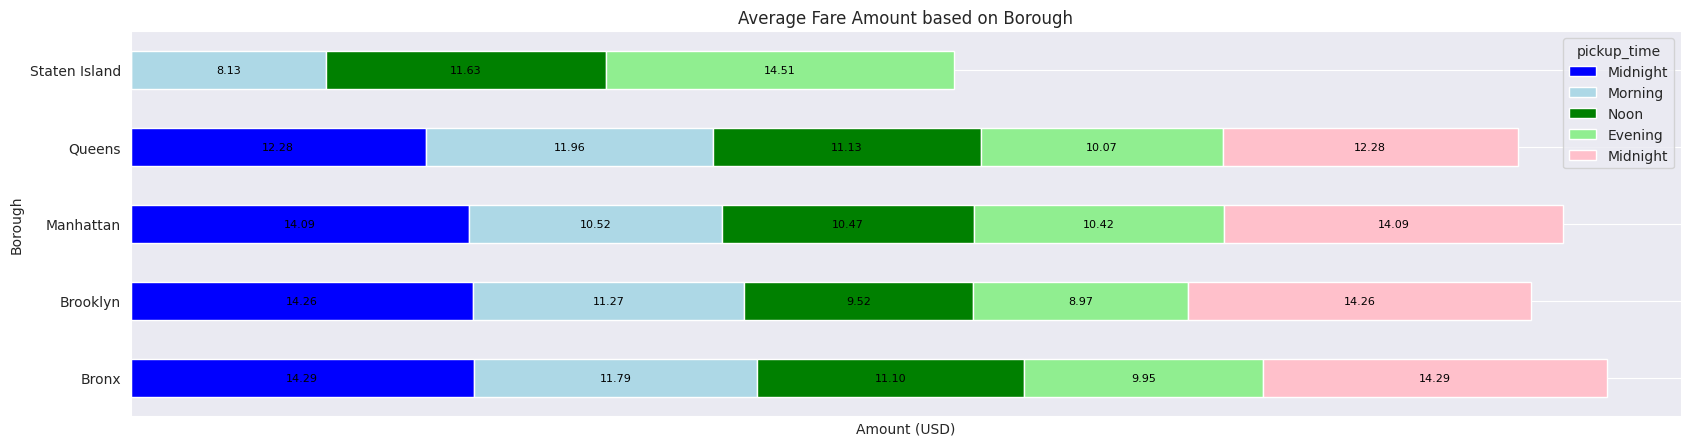

In [691]:
borough_amount_stack = df.pivot_table(index='PU_Borough', columns='pickup_time', values='speed', aggfunc='median').fillna(0)
borough_amount_stack = borough_amount_stack[['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']]
borough_tip = df.groupby(['PU_Borough', 'pickup_time']).agg(median_tip=('tip_amount', 'median')).sort_values(by='median_tip', ascending=False).reset_index().round(2)

ax = borough_amount_stack.plot(kind='barh', stacked=True, color=['blue','lightblue','green','lightgreen','pink'], figsize=(20,5))
plt.title('Average Fare Amount based on Borough')
plt.xlabel('Amount (USD)')
plt.ylabel('Borough')
plt.xticks([])
for idx, rect in enumerate(ax.patches):
    width = rect.get_width()
    if width > 0:
        y = rect.get_y() + rect.get_height() / 2
        cum_width_prev_segments = sum(borough_amount_stack.iloc[idx % len(borough_amount_stack), :idx // len(borough_amount_stack)])
        x = cum_width_prev_segments + width / 2
        plt.text(x, y, f"{width:.2f}", ha='center', va='center', color='black', fontsize=8)


Rata rata Fare Amount Manhattan disetiap kelompok waktu lebih stabil dibandingkan daerah lain

## Tip Amount Correlation To Other Feature

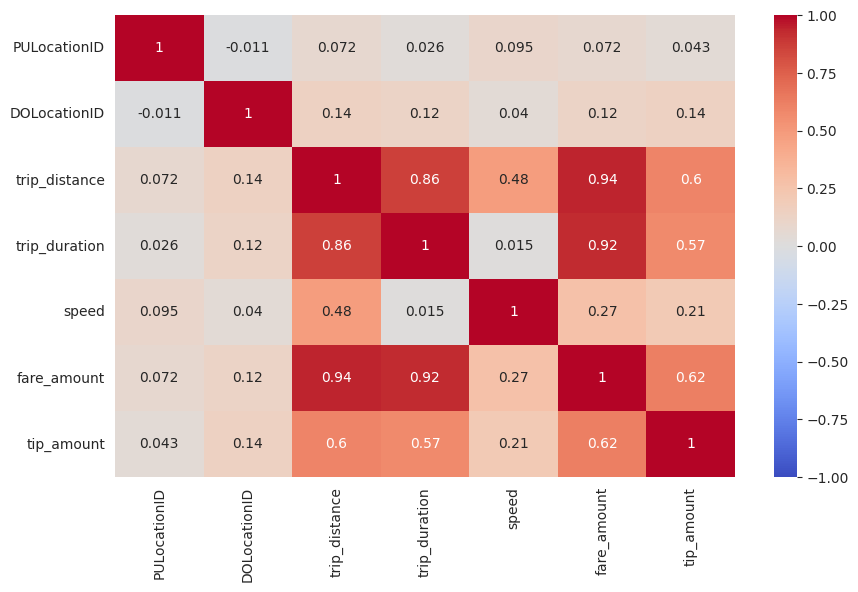

In [692]:
df_tip_corr = df[['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration', 'speed', 'fare_amount', 'tip_amount']][df['tip_amount']>0]
plt.figure(figsize=(10,6))
sns.heatmap(df_tip_corr.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

## Signifikansi Tip Amount terhadap Fitur Lain

### RatecodeID

In [693]:
# ratecode_tip_corr = df[df['tip_amount']>0][['RatecodeID', 'tip_amount']]
# tip_ratecode= ratecode_tip_corr.groupby('RatecodeID').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# tip_ratecode

In [694]:
ratecode_tip_corr = df[['RatecodeID', 'tip_amount']]
tip_ratecode= ratecode_tip_corr.groupby('RatecodeID').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_ratecode

RatecodeID  count  avg_tip  median_tip
0              JFK    152    12.38       15.61
1  Negotiated fare    642     2.84        0.00
2           Newark     11    12.79        5.30
3    Standard rate  59903     2.24        2.00

In [695]:
#Ho: Median Tip Dengan Ratecode Standard Rate = JFK Airport = Newark Airport = Nassau or Westchester = Negotiated fare
#Ha: Setidaknya ada satu pasang yang tidak sama

from scipy.stats import kruskal

stat, pvalue= kruskal(
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Standard rate']['tip_amount'],
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'JFK Airport']['tip_amount'],
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Newark Airport']['tip_amount'],
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Negotiated fare']['tip_amount'],
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value nan
Tolak H0


Dengan taraf signifikansi 5% Ho ditolak. Ini berarti ada setidaknya satu pasang RatecodeID yang median tipnya berbeda. Dengan kata lain RatecodeID mempunyai cukup pengaruh terhadap tip yang diberikan konsumen

### Trip Type

In [696]:
# trip_type_tip_corr = df[df['tip_amount']>0][['trip_type', 'tip_amount']]
# ct_tip_trip_type= trip_type_tip_corr.groupby('trip_type').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# ct_tip_trip_type

In [697]:
trip_type_tip_corr = df[['trip_type', 'tip_amount']]
ct_tip_trip_type= trip_type_tip_corr.groupby('trip_type').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_trip_type

trip_type  count  avg_tip  median_tip
0     Dispatch    554     3.01         0.0
1  Street-hail  60154     2.27         2.0

In [698]:
#Ho: Median tip pada tipe perjalanan street-hail = Median tip pada tipe perjalanan melalui aplikasi

#Ha: Median tip pada tipe perjalanan street-hail < Median tip pada tipe perjalanan melalui aplikasi

from scipy.stats import mannwhitneyu

stat, pvalue= mannwhitneyu(
    trip_type_tip_corr[trip_type_tip_corr['trip_type'] == 'Street-hail']['tip_amount'],
    trip_type_tip_corr[trip_type_tip_corr['trip_type'] == 'Dispatch']['tip_amount'],
    alternative='less'
)

print('p-Value', pvalue/2)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.4999474947357872
Terima H0


Kesimpulan:
Dengan taraf signifikansi 5% Ho ditolak, artinya tidak ada perbedaaan yang cukup signifikan tip yang diperoleh berdasarkan trip type

### Pick Up Time

In [699]:
# putime_tip_corr = df[df['tip_amount']>0][['pickup_time', 'tip_amount']]
# ct_tip_putime = putime_tip_corr.groupby('pickup_time').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# ct_tip_putime

In [700]:
putime_tip_corr = df[['pickup_time', 'tip_amount']]
ct_tip_putime = putime_tip_corr.groupby('pickup_time').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_putime

pickup_time  count  avg_tip  median_tip
0    Midnight   3140     2.27        1.00
1     Morning  12833     2.30        1.88
2        Noon  14051     2.19        1.60
3     Evening  22573     2.33        2.00
4       Night   8111     2.26        2.00

In [701]:
# Ho: Median Tip Dengan Pada Kategori Waktu Midnight = Morning = Noon = Evening = Night

# Ha: Setidaknya ada satu pasang yang tidak sama (dan kita tidak tahu yang mana)

from scipy.stats import kruskal

stat, pvalue= kruskal(
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Midnight']['tip_amount'],
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Morning']['tip_amount'],
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Noon']['tip_amount'],
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Evening']['tip_amount'],
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Night']['tip_amount']
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 2.802027804013289e-22
Tolak H0


Kesimpulan:
Berdasarkan uji kruskal dengan signifikansi 5% tidak ada perbedaan yang signifikan median tip amount antara masing masing kategori pick up time. Dengan kata lain pickup time tidak mempengaruhi tip amount yang diberikan customer

### PU Borough

In [702]:
# PUBorough_tip_corr = df[df['tip_amount']>0][['PU_Borough', 'tip_amount']]
# tip_PUBorough= PUBorough_tip_corr.groupby('PU_Borough').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# tip_PUBorough

In [703]:
PUBorough_tip_corr = df[['PU_Borough', 'tip_amount']]
tip_PUBorough= PUBorough_tip_corr.groupby('PU_Borough').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_PUBorough

PU_Borough  count  avg_tip  median_tip
0          Bronx    802     0.97        0.00
1       Brooklyn   8057     3.09        2.58
2      Manhattan  36311     2.38        2.03
3         Queens  15530     1.67        0.00
4  Staten Island      8     1.53        1.00

In [704]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    df[df['PU_Borough'] == 'Manhattan']['tip_amount'],
    df[df['PU_Borough'] == 'Brooklyn']['tip_amount'],
    df[df['PU_Borough'] == 'Queens']['tip_amount'],
    df[df['PU_Borough'] == 'Bronx']['tip_amount'],
    df[df['PU_Borough'] == 'Staten Island']['tip_amount']
)
print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.0
Tolak H0


Karena Ho ditolak maka paling tidak ada salah satu pasangan yang berbeda signifikan.

In [705]:
H0 = "Median tip Manhattan sama dengan Queens"
Ha = "Median tip Manhattan lebih besar dengan Queens"
stat, pval = ttest_ind(df[df['PU_Borough']=='Manhattan']['tip_amount'], df[df['PU_Borough']=='Queens']['tip_amount'],alternative = 'greater')
if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: Median tip Manhattan lebih besar dengan Queens (pvalue = 7.898133929955528e-148)


### DO Borough

In [706]:
# DOBorough_tip_corr = df[df['tip_amount']>0][['DO_Borough', 'tip_amount']]
# tip_DOBorough= DOBorough_tip_corr.groupby('DO_Borough').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# tip_DOBorough

In [707]:
DOBorough_tip_corr = df[['DO_Borough', 'tip_amount']]
tip_DOBorough= DOBorough_tip_corr.groupby('DO_Borough').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_DOBorough

DO_Borough  count  avg_tip  median_tip
0          Bronx   2002     1.12        0.00
1       Brooklyn   6726     2.57        2.15
2            EWR     21    11.80       10.00
3      Manhattan  36503     2.45        2.16
4         Queens  15446     1.86        0.00
5  Staten Island     10     0.98        0.00

In [708]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    df[df['DO_Borough'] == 'Manhattan']['tip_amount'],
    df[df['DO_Borough'] == 'Brooklyn']['tip_amount'],
    df[df['DO_Borough'] == 'Queens']['tip_amount'],
    df[df['DO_Borough'] == 'Bronx']['tip_amount'],
    df[df['DO_Borough'] == 'Staten Island']['tip_amount']
)
print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0: paling tidak ada salah satu pasangan yang berbeda signifikan')

p-Value 0.0
Tolak H0: paling tidak ada salah satu pasangan yang berbeda signifikan


In [709]:
H0 = "rata-rata tip Manhattan sama dengan Queens"
Ha = "rata-rata tip Manhattan lebih besar dengan Queens"
stat, pval = ttest_ind(df[df['DO_Borough']=='Manhattan']['tip_amount'], df[df['DO_Borough']=='Queens']['tip_amount'],alternative = 'greater')
if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: rata-rata tip Manhattan lebih besar dengan Queens (pvalue = 2.3783670057074884e-100)


### Trip Distance

In [710]:
# tip_distance_corr= df[df['tip_amount']>0][['tip_amount', 'distance_bins']]
# tipXdistance = tip_distance_corr.groupby('distance_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).reset_index().round(2)
# tipXdistance

In [711]:
tip_distance_corr= df[['tip_amount', 'distance_bins']]
tipXdistance = tip_distance_corr.groupby('distance_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).reset_index().round(2)
tipXdistance

distance_bins  count  avg_tip  median_tip
0      <2 miles  29899     1.46        1.50
1     3-6 miles  24682     2.60        2.71
2    7-10 miles   4579     4.39        4.41
3     >10 miles   1548     6.57        5.00

In [712]:
#Ho: Median tip pada trip yang memiliki jarak <2 mile = 3-6 miles = 7-10 miles = >10 miles

#Ha: Median tip salah satu jarak memiliki nilai yang tidak sama secara signifikan
from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_distance_corr[tip_distance_corr['distance_bins'] == '<2 miles']['tip_amount'],
    tip_distance_corr[tip_distance_corr['distance_bins'] == '3-6 miles']['tip_amount'],
    tip_distance_corr[tip_distance_corr['distance_bins'] == '7-10 miles']['tip_amount'],
    tip_distance_corr[tip_distance_corr['distance_bins'] == '>10 miles']['tip_amount']
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.0
Tolak H0


kesimpulan:
Dengan taraf signifikansi 5% Ho ditolak atau ada salah satu pasangan distance bins yang mempunyai median yang berdeda. Hal ini berarti trip distance memoengaruhi tip yang diterima driver

### Trip Duration

In [713]:
# tip_duration_corr = df[df['tip_amount']>0][['tip_amount', 'duration_bins']]
# tip_duration = tip_duration_corr.groupby('duration_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# tip_duration

In [714]:
tip_duration_corr = df[['tip_amount', 'duration_bins']]
tip_duration = tip_duration_corr.groupby('duration_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_duration

duration_bins  count  avg_tip  median_tip
0    <10 minutes  23873     1.42        1.46
1  11-20 minutes  25780     2.34        2.35
2  21-30 minutes   7576     3.62        3.39
3    >30 minutes   3479     4.75        2.00

In [715]:
#Ho: Median tip pada trip yang memiliki durasi perjalanan <10 menit = 11-20 menit = 21-30 menit = >30 menit

#Ha: Median tip salah satu kelompok durasi memiliki nilai yang berbeda secara signifikan

from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_duration_corr[tip_duration_corr['duration_bins'] == '<10 minutes']['tip_amount'],
    tip_duration_corr[tip_duration_corr['duration_bins'] == '11-20 minutes']['tip_amount'],
    tip_duration_corr[tip_duration_corr['duration_bins'] == '21-30 minutes']['tip_amount'],
    tip_duration_corr[tip_duration_corr['duration_bins'] == '>30 minutes']['tip_amount']
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.0
Tolak H0


kesimpulan:
Dengan taraf signifikansi 5% Ho ditolak atau ada salah satu pasangan duration bins yang mempunyai median yang berdeda. Dengan kata lain trip duration mempengaruhi tip yang diterima driver

### Driving Speed

In [716]:
# tip_speed_corr = df[df['tip_amount']>0][['tip_amount', 'speed_bins']]
# tip_speed = tip_speed_corr.groupby('speed_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
# tip_speed

In [717]:
tip_speed_corr = df[['tip_amount', 'speed_bins']]
tip_speed = tip_speed_corr.groupby('speed_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_speed

speed_bins  count  avg_tip  median_tip
0    <10 mph  24915     1.87        1.74
1  11-20 mph  30925     2.32        2.00
2  21-30 mph   4150     3.82        2.95
3    >30 mph    718     5.27        4.46

In [718]:
#Ho: Median tip pada trip yang kecepatannya <10 mil = 11-20 mil = 21-30 mil = >30 mil

#Ha: Median tip salah satu kelompok kecepatan memiliki nilai yang berbeda secara signifikan

from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_speed_corr[tip_speed_corr['speed_bins'] == '<10 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed_corr[tip_speed_corr['speed_bins'] == '11-20 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed_corr[tip_speed_corr['speed_bins'] == '21-30 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed_corr[tip_speed_corr['speed_bins'] == '>30 mph']['tip_amount'].sample(100, random_state=0)
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.008342045922430185
Tolak H0


kesimpulan:
Dengan taraf signifikansi 5% Ho ditolak atau ada salah satu pasangan speed bins yang mempunyai median yang berdeda. Dengan kata lain kecepatan mempengaruhi tip yang diterima driver

### Fare Amount

In [719]:
tip_fare_corr = df[['tip_amount', 'fare_amount_bins']]
tip_fare = tip_fare_corr.groupby('fare_amount_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_fare

fare_amount_bins  count  avg_tip  median_tip
0             <20$  45975     1.75        1.83
1           21-40$  12270     3.52        3.31
2           41-60$   1830     5.20        4.00
3             >60$    623     7.88        5.00

In [720]:
#Ho: Median tip pada fare amount <20$ = 21-40$ = 41-60$ = >60$

#Ha: Median tip salah satu kelompok fare_amount memiliki nilai yang berbeda secara signifikan

from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_fare_corr[tip_fare_corr['fare_amount_bins'] == '<20$']['tip_amount'],
    tip_fare_corr[tip_fare_corr['fare_amount_bins'] == '21-40$']['tip_amount'],
    tip_fare_corr[tip_fare_corr['fare_amount_bins'] == '41-60$']['tip_amount'],
    tip_fare_corr[tip_fare_corr['fare_amount_bins'] == '>60$']['tip_amount']
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.0
Tolak H0


Kesimpulan:
Dengan taraf signifikansi 5% Ho ditolak atau ada salah satu pasangan fare amount bins yang mempunyai median yang berdeda. Dengan kata lain kecepatan mempengaruhi tip yang diterima driver

Insights:

- Terdapat beberapa faktor yang mempengaruhi penumpang atau pelanggan memeberikan tip lebih besar yaitu
1. jarak
2. durasi
3. kecepatan taksi
4. fare amount
Semakin besar nilai 4 faktor di atasa maka cenderung semakin besar tip yang diberikan.

- Selain itu, jenis tarif juga mempengerahi besarnya tip yang diberikan secara signifikan.

- Sementara faktor waktu seperti weekend/weekdays dan waktu pagi/siang/sore/malam tidak mempengeruhi jumlah tip yang diberikan.

## Perbedaan Tip Di Setiap PU Borough

In [721]:
borough_tip = df.groupby(['PU_Borough']).agg(counttrip=('PU_Borough','count'),avg_tip=('tip_amount', 'mean'),median_tip=('tip_amount', 'median'), median_speed=('speed','median'),median_distance=('trip_distance','median')).sort_values(by='median_tip', ascending=False).reset_index().round(2)
borough_tip

PU_Borough  counttrip  avg_tip  median_tip  median_speed  \
0       Brooklyn       8057     3.09        2.58         10.05   
1      Manhattan      36311     2.38        2.03         10.78   
2  Staten Island          8     1.53        1.00         11.44   
3          Bronx        802     0.97        0.00         11.40   
4         Queens      15530     1.67        0.00         11.07   

   median_distance  
0             2.68  
1             1.90  
2             1.62  
3             3.06  
4             2.16

Insight:
Berdasarkan tabel diatas, salah satu faktor yang membedakan tip dimasing masing daerah adalah trip distance. Yang mana broklyn memiliki rata-rata tip tertinggi dengan trip distace yang tertinggi. Untuk Manhattan dan Queens dapat dilihat bahwa rata-rata tip lebih kecil dibandingkan Brooklyn karena trip distance nya lebih kecil dibandingkan Broklyn.

# Conclusion and Recommendation

## Conclusion

**Demand**

- Permintaan taksi paling tinggi di bulan januari terjadi pada hari Rabu, 25 Januari 2023, sedangkan permintaan terendah pada 1 Januari 2023.

- Permintaan pada bulan Januari memiliki pola yang cukup stabil setiap minggunya. Permintaan cenderung naik selama weekdays kemudian menurun ketika memasuki hari weekend.

- Pada weekdays permintaan mulai meningkat mulai jam 07.00 s/d 19.00 dengan puncak keramaian terjadi di jam 15.00 s/d 18.00. Sementara untuk weekend demand mulai meningkat pada pukul 11 s/d 20.00 engan puncak keramaian terjadi di jam 15.00 s/d 18.00

- Manhattan adalah wilayah dengan permintaan tertinggi &  East Harlem adalah zona permintaan teritinggi

- Permintaan cenderung menggunakan taksi dengan jenis tarif dalam kota dengan trip type street-hail (pemanggilan taksi dipinggir jalan) dan metode pembayaran didominasi kartu kredit atau tunai.

- Perjalanan di dominasi dengan jarak kurang dari 2 mil dengan durasi 11-20 menit

**Pendapatan Berdasarkan Waktu dan Wilayah**

- Terdapat rute-rute yang permintaan dan rata-rata tarif yang juga tinggi seperti dari East Harlem North ke Upper West Side North.

- Tarif rata-rata cenderung lebih mahal di tengah malam dan lebih murah di malam hari.


- Wilayah Manhattan memiliki total fare amount tertinggi dari wilayah lain. Hal ini sejalan dengan permintaan yang tinggi di wilayah tersebut. Rata-rate Fare Amount di wilayah Manhattan cenderung lebih stabil dari daerah lain

    
**Faktor yang Mempengaruhi Tip**

- Jarak perjalanan (trip_distance), durasi perjalanan (trip_duration) dan total tarif (fare_amount) memiliki korelasi positif yang kuat dengan besarnya tip yang diberikan oleh pelanggan.

- Kecepatan berkendara juga memiliki korelasi positif yang mana semakin tinggi kecepatan tip amount yang diberikan pelanggan juga naik

- Jenis tarif mempengaruhi besarnya tip yang diberikan secara signifikan.

- Waktu (baik berdasarkan hari maupun jam) tidak memiliki pengaruh signifikan terhadap besarnya tip yang diberikan oleh pelanggan.

**Kesimpulan Umum:**

Permintaan taksi lebih tinggi pada hari kerja dibandingkan weekend, dengan sore hari menjadi waktu yang paling sibuk. Manhattan mendominasi dalam hal volume perjalanan, dengan tarif perjalanan dalam kota menjadi pilihan utama pelanggan. Selain itu, tarif dan jarak perjalanan adalah faktor utama yang mempengaruhi besarnya tip yang diberikan oleh pelanggan.

**Rekomendasi**
1. Keterdiaan Taxi
   - Optimalkan jumlah taxi pada weekdays dan perbanyak armada taxi pada jam sibuk yaitu  15.00 s/d 18.00.
   - Untuk weekend permintaan meningkat pada pukul 11 s/d 20.00 dan jumlah permintaan cenderung lebih kecil daripada weekdays akan lebih optimal jika armada dikurangi
   -Pastikan ketersediaan taxi pada rute yang memiliki rata-rata fare amount tertinggi seperti West Side North, Upper Yorkville West, dan sebagainya.
2. Strategi Wilayah
   - Untuk PU Borough Manhattan dan Quees disarankan untuk membuka perjalanan yang lebih jauh minimal dengan trip distance 2.68 (angka ini didapat dari rata-rata trip distance Broklyn yang memiliki rata-rata trip tertinggi)
   - Berikan promo untuk wilayah-wilayah yang sepi permintaan seperti Bronx dan Staten Island

3. Strategi untuk Meningkatkan Demand dan Profit
   - Pertimbangkan untuk penyesuaian tarif berdasarkan permintaan. Misalnya, naikkan tarif sebesar 1-3% saat puncak permintaan di jam sibuk
   - Tawarkan promo atau diskon pada saat-saat permintaan rendah, misalnya pada tengah malam atau awal pagi, untuk menarik lebih banyak pelanggan.
   - Tawarkan perjalanan kelompok yang memiliki drop off yang berbeda dan sesuaikan tarif yang make sense bagi customer dan perusahaan

4. Peningkatan Kualitas Pelayanan
   - Menambah metode pembayaran yang memudahkan pelanggan seperti QRIS dan yang lainnya
   - Memberikan edukasi pada driver dalam melayanani dan mengajak pelanggan berkomunikasi agar tidak bosan di jalan


